### PANDAS


#### Автор: Приходько Игорь Анатольевич

##### г.Санкт-Петербург


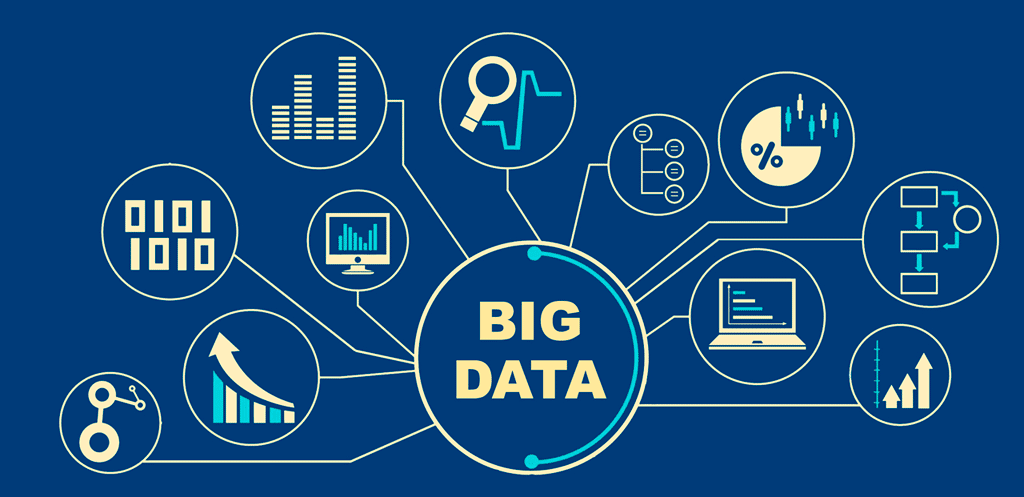

# 1 lesson

# Lesson topic: Знакомство с объектами библиотеки Pandas
# Pandas

Ранее мы рассмотрели библиотеку NumPy и ее объект ndarray, обеспечивающий эффективное хранение плотных массивов и манипуляции над ними
в Python. 

Начиная с сегодняшнего занятия, мы, основываясь на этих знаниях, детально ознакомимся со
структурами данных библиотеки Pandas.

Pandas — более новый пакет, надстройка над библиотекой NumPy, обеспечивающий
эффективную реализацию класса DataFrame. 

##### Объекты DataFrame — многомерные массивы с метками для строк и столбцов, а также зачастую 

##### с неоднородным типом данных и/или пропущенными данными. 

Помимо удобного интерфейса для хранения маркированных данных, библиотека Pandas реализует множество операций для работы с данными хорошо знакомых пользователям фреймворков баз данных и электронных таблиц.

Структура данных ndarray библиотеки NumPy предоставляет все необходимые
возможности для работы с хорошо упорядоченными данными в задачах численных
вычислений. 

Для этой цели библиотека NumPy отлично подходит, однако имеет свои ограничения, которые становятся заметными, чуть только нам потребуется немного больше гибкости (маркирование данных, работа с пропущенными данными
и т. д.). 

Эти ограничения проявляются также при попытках выполнения операций, неподходящих для поэлементного транслирования (группировки, создание
сводных таблиц и т. д.). 

Такие операции являются важной частью анализа данных с меньшей степенью структурированности, содержащихся во многих формах окружающего мира. 

Библиотека Pandas, особенно ее объекты Series и DataFrame,
основана на структурах массивов библиотеки NumPy и обеспечивает эффективную
работу над подобными задачами «очистки данных».

Для начала мы сосредоточимся на стандартных приемах использования объектов
Series, DataFrame и связанных с ними структур. 

По мере возможности мы будем применять взятые из реальных наборов данных примеры, но они не являются нашей целью.

# Установка и использование библиотеки Pandas

Для установки пакета Pandas необходимо наличие в вашей системе пакета NumPy, а если вы выполняете сборку библиотеки из исходного кода, то и соответствующих утилит для компиляции исходных кодов на языках С и Cython, из которых состоит Pandas. 

Подробные инструкции по установке можно найти
в документации пакета Pandas (http://pandas.pydata.org/). 

##### Один из вариантов установки Pandas на Ваш компьютер - 
##### в ячейке Jupyter Notebook ввести команду:

##### !pip install pandas

Если же вы последовали совету из предисловия и воспользовались стеком Anaconda, то пакет Pandas
у вас уже имеется.

После установки пакета Pandas можно импортировать его и проверить версию:

In [2]:
import pandas
pandas.__version__

'2.2.3'

Аналогично тому, как мы импортировали пакет NumPy под псевдонимом (alias) np, пакет Pandas импортируем под псевдонимом pd:

In [3]:
import pandas as pd

Мы будем использовать эти условные обозначения для импорта далее в курсе.

# Знакомство с объектами библиотеки Pandas

##### На самом примитивном уровне объекты библиотеки Pandas можно считать расширенной версией структурированных массивов 

##### библиотеки NumPy, в которых строки и столбцы идентифицируются метками, а не простыми числовыми индексами. 

Библиотека Pandas предоставляет множество полезных утилит, методов и функциональности в дополнение к базовым структурам данных, но все последующее изложение потребует понимания этих базовых структур. 

Позвольте познакомить вас с тремя фундаментальными структурами данных библиотеки

##### Pandas: классами Series, DataFrame и Index.

Начнем наш сеанс программирования с обычных импортов библиотек NumPy и Pandas:

In [4]:
import numpy as np
import pandas as pd

# Объект Series библиотеки Pandas

##### Объект Series библиотеки Pandas — одномерный массив индексированных данных. 

Его можно создать из списка или массива следующим образом:

In [5]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

Как мы видели из предыдущего результата, объект Series служит адаптером как для последовательности значений, 

так и последовательности индексов, к которым можно получить доступ посредством 

##### атрибутов values и index. 

Атрибут values представляет собой уже знакомый нам массив NumPy:

In [6]:
 data.values

array([0.25, 0.5 , 0.75, 1.  ])

index — массивоподобный объект типа pd.Index, который мы рассмотрим подробнее далее:

In [7]:
 data.index

RangeIndex(start=0, stop=4, step=1)

Аналогично массивам библиотеки NumPy, к данным можно обращаться по соответствующему им индексу посредством нотации с использованием квадратных
скобок языка Python:

In [8]:
 data[1]

np.float64(0.5)

In [9]:
 data[1:3]

1    0.50
2    0.75
dtype: float64

Однако объект Series библиотеки Pandas намного универсальнее и гибче, чем эмулируемый им одномерный массив библиотеки NumPy.

# Объект Series как обобщенный массив NumPy

Может показаться, что объект Series и одномерный массив библиотеки NumPy взаимозаменяемы. 

##### Основное различие между ними — индекс. 

В то время как индекс массива NumPy, используемый для доступа к значениям, — целочисленный и описывается неявно, индекс объекта Series библиотеки Pandas описывается явно и связывается со значениями.

Явное описание индекса расширяет возможности объекта Series. 

##### Такой индекс не должен(не обязан)  быть целым числом, а может состоять из значений любого нужного типа.

Например, при желании мы можем использовать в качестве индекса строковые значения:

In [10]:
data = pd.Series([0.25, 0.5, 0.75, 1.0], 
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

При этом доступ к элементам работает обычным образом:

In [11]:
 data['b']

np.float64(0.5)

Можно применять даже индексы, состоящие из несмежных или непоследовательных значений:

In [12]:
data = pd.Series([0.25, 0.5, 0.75, 1.0], 
                 index=[2, 5, 3, 7])
data

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

In [13]:
data[4]

KeyError: 4

In [14]:
data[3]

np.float64(0.75)

# Объект Series как специализированный словарь

Объект Series библиотеки Pandas можно рассматривать как специализированную разновидность словаря языка Python. 

Словарь — структура, задающая соответствие
произвольных ключей набору произвольных значений, а объект Series — структура, задающая соответствие типизированных ключей набору типизированных
значений. 

Типизация важна: точно так же, как соответствующий типу специализированный код для массива библиотеки NumPy при выполнении определенных операций делает его эффективнее, чем стандартный список Python, информация
о типе в объекте Series библиотеки Pandas делает его намного более эффективным для определенных операций, чем словари Python.

Можно сделать аналогию «объект Series — словарь» еще более наглядной, сконструировав объект Series непосредственно из словаря Python:

In [15]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

По умолчанию при этом будет создан объект Series с полученным из неотсортированных ключей индексом. 

Следовательно, для него возможен обычный доступ к элементам, такой же, как для словаря:

In [16]:
population['California']

np.int64(38332521)

Однако, в отличие от словаря, объект Series поддерживает характерные для массивов операции, такие как срезы:

In [17]:
population['California':'Illinois']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

Мы рассмотрим некоторые нюансы индексации и срезов в библиотеке Pandas в разделе «Индексация и выборка данных».

# Создание объектов Series

Мы уже изучили несколько способов создания объектов Series библиотеки Pandas с нуля. 

Все они представляют собой различные варианты следующего синтаксиса:

In [18]:
# pd.Series(data, index=index)

где index — необязательный аргумент, а data может быть одной из множества сущностей.

Например, аргумент data может быть списком или массивом NumPy. 

В этом случае index по умолчанию будет целочисленной последовательностью:

In [19]:
pd.Series([2, 4, 6])

0    2
1    4
2    6
dtype: int64

Аргумент data может быть скалярным значением, которое будет повторено нужное количество раз для заполнения заданного индекса:

In [20]:
pd.Series(5, index=[100, 200, 300])

100    5
200    5
300    5
dtype: int64

Аргумент data может быть словарем, в котором index по умолчанию является неотсортированными ключами этого словаря:

In [21]:
pd.Series({2:'a', 1:'b', 3:'c'})

2    a
1    b
3    c
dtype: object

В каждом случае индекс можно указать вручную, если необходимо получить другой результат:


In [22]:
s = pd.Series({2:'a', 1:'b', 3:'c'}, index=[3, 2])
s[2]

'a'

In [23]:
s.index

Index([3, 2], dtype='int64')

In [24]:
s.values

array(['c', 'a'], dtype=object)

In [25]:
s[3]

'c'

In [26]:
s[1]

KeyError: 1

Обратите внимание, что объект Series заполняется только заданными явным образом ключами.

# Объект DataFrame библиотеки Pandas

Следующая базовая структура библиотеки Pandas — объект DataFrame. 

Как и объект Series, обсуждавшийся в предыдущем разделе, объект DataFrame можно рассматривать или как обобщение массива NumPy, или как специализированную версию словаря Python. 

Изучим оба варианта.

### DataFrame как обобщенный массив NumPy

##### Если объект Series — аналог одномерного массива с гибкими индексами, 

##### объект DataFrame — аналог двумерного массива с гибкими индексами строк и гибкими именами столбцов. 

Аналогично тому, что двумерный массив можно рассматривать
как упорядоченную последовательность выровненных столбцов, объект DataFrame можно рассматривать как упорядоченную последовательность выровненных объектов Series. 

Под «выровненными» имеется в виду то, что они используют один и тот же индекс.

Чтобы продемонстрировать это, сначала создадим новый объект Series, содержащий площадь каждого из пяти упомянутых в предыдущем разделе штатов:

In [27]:
import pandas as pd
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297, 'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64

Воспользовавшись объектом population класса Series, сконструируем на основе словаря единый двумерный объект, содержащий всю эту информацию:

In [28]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64

In [29]:
states = pd.DataFrame({'population': population, 'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


Аналогично объекту Series у объекта DataFrame имеется атрибут index, обеспечивающий доступ к меткам индекса:

In [30]:
states.index

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')

Помимо этого, у объекта DataFrame есть атрибут columns, представляющий собой содержащий метки столбцов объект Index:

In [31]:
states.columns

Index(['population', 'area'], dtype='object')

Таким образом, объект DataFrame можно рассматривать как обобщение двумерного массива NumPy, где как у строк, так и у столбцов есть обобщенные индексы для доступа к данным.

# Объект DataFrame как специализированный словарь

DataFrame можно рассматривать как специализированный словарь. 

Если словарь задает соответствие ключей значениям, то DataFrame задает соответствие имени столбца объекту Series с данными этого столбца. 

Например, запрос данных по атрибуту 'area' приведет к тому, что будет возвращен объект Series, содержащий
уже виденные нами ранее площади штатов:

In [32]:
states['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

Обратите внимание на возможный источник путаницы: в двумерном массиве NumPy data[0] возвращает первую строку.

По этой причине объекты DataFrame лучше рассматривать как обобщенные словари, а не обобщенные массивы, хотя обе
точки зрения имеют право на жизнь. 

Мы изучим более гибкие средства индексации
объектов DataFrame в разделе «Индексация и выборка данных» этой главы.

In [33]:
states['population']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
Name: population, dtype: int64

In [34]:
# Забегая вперёд, так можно получить содержимое строки Texas из DataFrame, используя неявный индекс строки
states.iloc[1]

population    26448193
area            695662
Name: Texas, dtype: int64

In [35]:
# Забегая вперёд, так можно получить содержимое строки Texas из DataFrame, используя явный индекс строки
states.loc['Texas']

population    26448193
area            695662
Name: Texas, dtype: int64

# Создание объектов DataFrame

Существует множество способов создания объектов DataFrame библиотеки Pandas.

Вот несколько примеров.

Из одного объекта Series. 

Объект DataFrame — набор объектов Series. 

DataFrame, состоящий из одного столбца, можно создать на основе одного объекта Series:

In [36]:
pd.DataFrame(population, columns=['population'])

,population
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


Из списка словарей. Любой список словарей можно преобразовать в объект DataFrame. 

Мы воспользуемся простым списковым включением для создания данных:

In [37]:
data = [{'a': i, 'b': 2 * i} for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


Даже если некоторые ключи в словаре отсутствуют, библиотека Pandas просто заполнит их значениями 

##### NaN (то есть Not a number — «не является числом»):

In [38]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


Из словаря объектов Series. 

Объект DataFrame также можно создать на основе словаря объектов Series:


In [39]:
pd.DataFrame({'population': population, 'area': area})

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


Из двумерного массива NumPy. 

Если у нас есть двумерный массив данных, мы можем создать объект DataFrame с любыми заданными именами столбцов и индексов. 

Для каждого из пропущенных значений будет использоваться целочисленный индекс:

In [41]:
import pandas as pd
import numpy as np
pd.DataFrame(np.random.rand(3, 2), columns=['foo', 'bar'], index=['a', 'b', 'c'])

,foo,bar
a,0.121707,0.605250
b,0.284902,0.190182
c,0.682787,0.263895


# Объект Index библиотеки Pandas

Как объект Series, так и объект DataFrame содержат явный индекс, обеспечивающий возможность ссылаться на данные и модифицировать их. 

##### Объект Index можно рассматривать или как неизменяемый массив (immutable array), 

##### или как упорядоченное множество (ordered set) (формально мультимножество, так как

##### объекты Index могут содержать повторяющиеся значения). 

Из этих способов его представления следуют некоторые интересные возможности операций над объектами Index. 

В качестве простого примера создадим Index из списка целых чисел:

In [42]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Index([2, 3, 5, 7, 11], dtype='int64')

# Объект Index как неизменяемый массив

Объект Index во многом ведет себя аналогично массиву. 

Например, для извлечения из него значений или срезов можно использовать стандартную нотацию индексации языка Python:

In [43]:
ind[1]

np.int64(3)

In [44]:
ind[::2]

Index([2, 5, 11], dtype='int64')

У объектов Index есть много атрибутов, знакомых нам по массивам NumPy:

In [45]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

5 (5,) 1 int64


In [46]:
ind.shape

(5,)

Одно из различий между объектами Index и массивами NumPy — неизменяемость индексов, то есть их нельзя модифицировать стандартными средствами:


In [47]:
ind[1] = 0

TypeError: Index does not support mutable operations

Неизменяемость делает безопаснее совместное использование индексов несколькими объектами DataFrame и массивами, исключая возможность побочных эффектов в виде случайной модификации индекса по неосторожности.

### Index как упорядоченное множество

Объекты библиотеки Pandas спроектированы с прицелом на упрощение таких операций, как соединения наборов данных, зависящие от многих аспектов арифметики множеств. 

Объект Index следует большинству соглашений, используемых встроенной структурой данных set языка Python, так что объединения, пересечения, разности и другие операции над множествами можно выполнять привычным образом:

In [48]:
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

In [49]:
indA.intersection(indB) # пересечение

Index([3, 5, 7], dtype='int64')

In [50]:
indA.union(indB) # объединение

Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [51]:
indA.symmetric_difference(indB) # симметричная разность

Index([1, 2, 9, 11], dtype='int64')

Эти операции можно выполнять также методами объектов, например indA.intersection(indB).

### Домашнее задание

In [69]:
### Задача 1: Создать Series из нампиевского массива без индекса.

# В этом случае индекс не передается, поэтому по умолчанию индексом будет range(n), где n — длина массива.

data = np.array(['a', 'b', 'c', 'd', 'e'])
pd.Series(data)

0    a
1    b
2    c
3    d
4    e
dtype: object

In [72]:
### Задача 2: Создать Series из словаря.

# Передан список индексов большей длины, чем количество ключей, присутствующих в словаре. 

# В этом случае порядок индекса сохраняется, а отсутствующий элемент заполняется значением NaN (не число). 

dictionary = {'A': 50, 'B': 10, 'C': 80}
index=['B', 'C', 'D', 'A']
pd.Series(dictionary, index = index)

B    10.0
C    80.0
D     NaN
A    50.0
dtype: float64

In [73]:
### Задача 3: Создайть Series из списка с использованием 'index'аргумента.

[10, 20, 30, 40, 50], 
index = ['a', 'b', 'c', 'd', 'e']

pd.Series([10, 20, 30, 40, 50], index = ['a', 'b', 'c', 'd', 'e'])


a    10
b    20
c    30
d    40
e    50
dtype: int64

In [102]:
### Задача 4: Создайть из 2-х словарей 2 объекта Series, а из них создайте один объект Dataframe.

dict1 = {'California': 100,

                   'Texas': 200,
                   
                   'New York': 300,
                   
                   'Florida': 400,
                   
                   'Illinois': 500}

dict2 = {'California': 'aaa', 'Texas': 'bbb', 'New York': 'ccc', 'Florida': 'ddd', 'Illinois': 'eee'}
data_dict1 = pd.Series(dict1)
data_dict2 = pd.Series(dict2)
pd.DataFrame({'data_dict1' : data_dict1, 'data_dict2' : data_dict2})

,data_dict1,data_dict2
California,100,aaa
Texas,200,bbb
New York,300,ccc
Florida,400,ddd
Illinois,500,eee


In [104]:
### Задача 5: Создать Index на основе списка 

list('abc')
pd.Index(list('abc'))

Index(['a', 'b', 'c'], dtype='object')

### Задача 6: Создать Pandas Dataframe из 2D-списка.

lst = [['Сейчас', 25], ['я', 30], 
       
    ['изучаю', 26], ['Pandas', 22]] 

# 2 lesson

# Lesson topic: Индексация и выборка данных

Мы подробно рассмотрели методы и инструменты доступа, задания и изменения значений в массивах библиотеки NumPy: индексацию (arr[2, 1]), срезы
массивов (arr[:,1:5]), маскирование (arr[arr > 0]), «прихотливую» индексацию (arr[0,[1,5]]), а также их комбинации (arr[:,[1,5]]). 

Здесь мы изучим аналогичные средства доступа и изменения значений в объектах Series и DataFrame библиотеки Pandas. 

Если вы использовали паттерны библиотеки NumPy, то соответствующие паттерны библиотеки Pandas будут для вас привычны.

Начнем с простого случая одномерного объекта Series, после чего перейдем к более сложному двумерному объекту DataFrame.

# Выборка данных из объекта Series

Объект Series во многом ведет себя подобно одномерному массиву библиотеки NumPy и стандартному словарю языка Python. 

Это поможет нам лучше понимать паттерны индексации и выборки данных из этих массивов.

### Объект Series как словарь

Объект Series задает соответствие набора ключей набору значений аналогично словарю:

In [52]:
import pandas as pd
data = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [53]:
data['b']


np.float64(0.5)

Для просмотра ключей/индексов и значений выражения можно также использовать методы языка Python, аналогичные таковым для словарей:

In [54]:
'a' in data

True

In [55]:
data.keys()


Index(['a', 'b', 'c', 'd'], dtype='object')

In [56]:
data.index is data.keys()

True

In [57]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

In [58]:
data.items()

In [59]:
data.values

array([0.25, 0.5 , 0.75, 1.  ])

Объекты Series можно модифицировать с помощью синтаксиса, подобного синтаксису для словарей. 

Аналогично расширению словаря путем присваивания
значения для нового ключа можно расширить объект Series, присвоив значение для нового значения индекса:

In [60]:
data['e'] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

Такая легкая изменяемость объектов — удобная возможность: библиотека Pandas сама, незаметно для нас, принимает решения о размещении в памяти и необходимости копирования данных. 

Пользователю, как правило, не приходится заботиться о подобных вопросах.

# Объект Series как одномерный массив


Объект Series, основываясь на интерфейсе, напоминающем словарь, предоставляет возможность выборки элементов с помощью тех же базовых механизмов, что и для массивов NumPy, то есть срезов, маскирования и «прихотливой» индексации.

Приведу несколько примеров:

In [64]:
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

In [65]:
# срез посредством явного индекса
data['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

In [66]:
# срез посредством неявного целочисленного индекса
data[0:2]

a    0.25
b    0.50
dtype: float64

In [61]:
# маскирование
data[(data > 0.3) & (data < 0.8)]

b    0.50
c    0.75
dtype: float64

In [67]:
# «прихотливая» индексация
data[['a', 'e']]


a    0.25
e    1.25
dtype: float64

Наибольшие затруднения среди них могут вызвать срезы. 

Обратите внимание, что при выполнении среза с помощью явного индекса (data['a':'c']) значение, соответствующее последнему индексу, включается в срез, а при срезе неявным индексом (data[0:2]) — не включается.

In [92]:
data['a':'c']

TypeError: slice indices must be integers or None or have an __index__ method

In [ ]:
data[0:2]

### Индексаторы: loc, iloc

Подобные обозначения для срезов и индексации могут привести к путанице.

Например, при наличии у объекта Series явного целочисленного индекса операция индексации (data[1]) будет использовать явные индексы, а операция среза
(data[1:3]) — неявный индекс в стиле языка Python.

In [93]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [94]:
# Использование явного индекса при индексации
data[1]


'a'

In [95]:
# Использование неявного индекса при срезе
data[1:3]

3    b
5    c
dtype: object

Из-за этой потенциальной путаницы в случае целочисленных индексов в библиотеке Pandas предусмотрены специальные атрибуты-индексаторы, позволяющие явным образом применять определенные схемы индексации.

Они являются не функциональными методами, а именно атрибутами, предоставляющими для данных из объекта Series определенный интерфейс для выполнения срезов

Во-первых, атрибут loc позволяет выполнить индексацию и срезы с использованием явного индекса:

In [96]:
data.loc[1]

'a'

In [97]:
data.loc[1:3]


1    a
3    b
dtype: object

Атрибут iloc дает возможность выполнить индексацию и срезы, применяя неявный
индекс в стиле языка Python:


In [98]:
data.iloc[1]

'b'

In [99]:
data.iloc[1:3]

3    b
5    c
dtype: object

Третий атрибут-индексатор ix (устаревший атрибут, но Вы можете его встретить в литературе) представляет собой гибрид первых двух и дляобъектов Series эквивалентен обычной индексации с помощью []. 

Назначение индексатора ix станет понятнее в контексте объектов DataFrame, которые мы рассмотрим далее.

Один из руководящих принципов написания кода на языке Python — «лучше явно,чем неявно». 

То, что атрибуты loc и iloc по своей природе явные, делает их очень удобными для обеспечения «чистоты» и удобочитаемости кода. 

Я рекомендую использовать оба, особенно в случае целочисленных индексов, чтобы сделать код более простым для чтения и понимания и избежать случайных малозаметных
ошибок при обозначении индексации и срезов.

# Выборка данных из объекта DataFrame

Объект DataFrame во многом ведет себя аналогично двумерному или структурированному массиву, а также словарю объектов Series с общим индексом. 

Эти аналогии следует иметь в виду во время изучения способов выборки данных изобъекта.

### Объект DataFrame как словарь

Первая аналогия, которую мы будем обсуждать, — объект DataFrame как словарь схожих между собой объектов Series.

Вернемся к примеру про площадь и численность населения штатов:

In [103]:
area = pd.Series({'California': 423967, 
                  'Texas': 695662,
                  'New York': 141297, 
                  'Florida': 170312,
                  'Illinois': 149995})

pop = pd.Series({'California': 38332521, 
                 'Texas': 26448193,
                 'New York': 19651127, 
                 'Florida': 19552860,
                 'Illinois': 12882135})

data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


К отдельным объектам Series, составляющим столбцы объекта DataFrame, можно обращаться посредством такой же индексации, как и для словарей, по имени столбца:

In [105]:
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

Можно обращаться к данным и с помощью атрибутов, используя в их качестве строковые имена столбцов:

In [106]:
data.area

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

При доступе по имени атрибута-столбца фактически происходит обращение к тому же объекту, что и при словарном варианте доступа:


In [107]:
data.area is data['area']

True

Хотя это и удобное сокращенное написание, не забывайте, что оно работает не всегда! 

Например, если имена столбцов — не строки или имена столбцов конфликтуют с методами объекта DataFrame, доступ по именам атрибутов невозможен. 

Например, у объекта DataFrame есть метод pop(), так что выражение data.pop будет обозначать его, а не столбец "pop":

In [108]:
data.pop is data['pop']

False

Не поддавайтесь искушению присваивать значения столбцов посредством атрибутов. 

Лучше использовать выражение data['pop'] = z вместо data.pop = z.

Как и в случае с обсуждавшимися ранее объектами Series, такой «словарный» синтаксис можно применять для модификации объекта, например добавления еще одного столбца:

In [109]:
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,38332521,90.413926
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


Приведенный пример демонстрирует простоту синтаксиса поэлементных операций над объектами Series. 

Этот вопрос мы изучим подробнее в разделе «Операции над данными в библиотеке Pandas».


### Объект DataFrame как двумерный массив

Объект DataFrame можно рассматривать как двумерный массив с расширенными возможностями. 

Взглянем на исходный массив данных с помощью атрибута
values:

In [114]:
data.values

array([[4.23967000e+05, 3.83325210e+07, 9.04139261e+01],
       [6.95662000e+05, 2.64481930e+07, 3.80187404e+01],
       [1.41297000e+05, 1.96511270e+07, 1.39076746e+02],
       [1.70312000e+05, 1.95528600e+07, 1.14806121e+02],
       [1.49995000e+05, 1.28821350e+07, 8.58837628e+01]])

Мы можем выполнить множество привычных для массивов действий над объектом DataFrame. 

Например, транспонировать весь DataFrame, поменяв местами строки и столбцы:

In [111]:
data.T

,California,Texas,New York,Florida,Illinois
area,4.239670e+05,6.956620e+05,1.412970e+05,1.703120e+05,1.499950e+05
pop,3.833252e+07,2.644819e+07,1.965113e+07,1.955286e+07,1.288214e+07
density,9.041393e+01,3.801874e+01,1.390767e+02,1.148061e+02,8.588376e+01


Однако, когда речь заходит об индексации объектов DataFrame, становится ясно, что словарная индексация мешает нам рассматривать их просто как массивы
NumPy. 

В частности, указание отдельного индекса для массива означает доступ к строке:

In [112]:
data.values[0]

array([4.23967000e+05, 3.83325210e+07, 9.04139261e+01])

In [115]:
data['area']

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64

Таким образом, нам необходим еще один тип синтаксиса для индексации, аналогичной по стилю индексации массивов.

Библиотека Pandas применяет упомянутые
ранее индексаторы loc, iloc и ix. 

С помощью индексатора iloc можно индексировать исходный массив, как будто это простой массив NumPy (используя неявный синтаксис языка Python), но с сохранением в результирующих данных меток объекта DataFrame для индекса и столбцов:

In [116]:
data.iloc[:3, :2]

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127


In [117]:
data.loc[:'Illinois', :'pop']

,area,pop
California,423967,38332521
Texas,695662,26448193
New York,141297,19651127
Florida,170312,19552860
Illinois,149995,12882135


Не забывайте, что в случае целочисленных индексов индексатор ix может быть источником тех же проблем, что и при целочисленной индексации объектов Series.

В этих индексаторах можно использовать все уже знакомые вам паттерны доступа к данным в стиле библиотеки NumPy.

Например, в индексаторе loc можно сочетать
маскирование и «прихотливую» индексацию:

In [118]:
data.loc[data.density > 100, ['pop', 'density']]

,pop,density
New York,19651127,139.076746
Florida,19552860,114.806121


Любой такой синтаксис индексации можно применять для задания или изменения значений. 

Это выполняется обычным, уже привычным вам по работе с библиотекой NumPy, способом:

In [119]:
data.iloc[0, 2] = 90
data

,area,pop,density
California,423967,38332521,90.000000
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


Чтобы достичь уверенности при манипуляции данными с помощью библиотеки Pandas, рекомендую потратить немного времени на эксперименты над простым объектом DataFrame и пробы типов индексации, срезов, маскирования и «прихотливой» индексации.

### Дополнительный синтаксис для индексации

Существует еще несколько вариантов синтаксиса для индексации, казалось бы, плохо согласующихся с обсуждавшимся ранее, но очень удобных на практике. 

Вопервых, если индексация относится к столбцам, срезы относятся к строкам:

In [120]:
data['Florida':'Illinois']

,area,pop,density
Florida,170312,19552860,114.806121
Illinois,149995,12882135,85.883763


При подобных срезах можно также ссылаться на строки по номеру, а не по индексу:

In [121]:
 data[1:3]

,area,pop,density
Texas,695662,26448193,38.018740
New York,141297,19651127,139.076746


In [122]:
#так будет ошибка
data['Texas']

KeyError: 'Texas'

In [123]:
data['pop']

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
Name: pop, dtype: int64

In [124]:
data[:'Texas']

,area,pop,density
California,423967,38332521,90.00000
Texas,695662,26448193,38.01874


Непосредственные операции маскирования также интерпретируются построчно, а не по столбцам:

In [125]:
data[data.density > 100]

,area,pop,density
New York,141297,19651127,139.076746
Florida,170312,19552860,114.806121


Эти два варианта обозначений синтаксически подобны таковым для массивов библиотеки NumPy, и они, возможно, хоть и не вполне вписываются в шаблоны синтаксиса библиотеки Pandas, но весьма удобны на практике.

### Домашнее задание

### Задача 1: Дана Series. Выбрать из нее определённое значение, используя метод .loc() и метод iloc.()

x = pd.Series([10, 20, 30, 40, 50], index =['a', 'b', 'c', 'd', 'e']) 

Выберите из Series значение 30, используя метод .loc() и метод iloc.()

### Задача 2: Дан DataFrame. 

### Выбрать из него вторую и третью строки, используя метод .loc() и/или метод iloc.()

### Выбрать из него второй столбец, используя метод .loc() и/или метод iloc.()

### Выбрать из него значение 'bbb', используя метод .loc() и/или метод iloc.()

data = pd.DataFrame({'area': [1,2,3,4,5], 'pop': ['aaa', 'bbb', 'ccc', 'ddd', 'eee']})

### Задача 3: Транспонируйте DataFrame

data = pd.DataFrame({'column_1': [35,21,39,54,59], 'column_2': [3000, [1,2,3], 'Hello', True, 47.39]})

# 3 lesson

# Lesson topic: Операции над данными в библиотеке Pandas

Одна из важнейших составляющих библиотеки NumPy — способность выполнять
быстрые поэлементные операции — как простейшие арифметические (сложение,
вычитание, умножение и т. д.), так и более сложные (тригонометрические, показательные и логарифмические функции и т. п.). 

##### Библиотека Pandas наследует от NumPy немалую часть этой функциональности, и ключ к ее использованию — универсальные функции, 

с которыми мы познакомились в разделе «Выполнение вычислений над массивами библиотеки NumPy: универсальные функции».

##### Однако библиотека Pandas включает несколько полезных трюков: для унарных операций, например изменения знака 

и тригонометрических функций, при использовании ее универсальных функций в выводе будут сохранены индекс 

и метки столбцов, а для бинарных операций, например сложения и умножения, библиотека Pandas будет автоматически 

выравнивать индексы при передаче объектов универсальной функции. 

##### Это значит, что сохранение контекста данных и объединение данных из различных источников — две задачи, 

потенциально чреватые ошибками при работе с исходными массивами библиотеки NumPy, — становятся надежно

защищенными от ошибок благодаря библиотеке Pandas. 

Кроме того, в библиотеке заданы операции между одномерными структурами объектов Series и двумерными структурами объектов DataFrame.

### Универсальные функции: сохранение индекса

В силу того что библиотека Pandas предназначена для работы с библиотекой NumPy, все универсальные функции библиотеки NumPy будут работать с объектами Series и DataFrame библиотеки Pandas. 

Начнем с описания простых объектов
Series и DataFrame для демонстрации этого:

In [126]:
import pandas as pd
import numpy as np

In [127]:
# «Seed» используется для инициализации внутреннего генератора псевдослучайных чисел. 
# А предоставление фиксированного seed гарантирует, что одна и та же серия вызовов методов 'RandomState' 
# всегда будет давать одни и те же результаты, что может быть полезно при тестировании.
rng = np.random.RandomState(42)
rng

RandomState(MT19937) at 0x120CB2740

In [128]:
ser = pd.Series(rng.randint(0, 10, 4))
ser

0    6
1    3
2    7
3    4
dtype: int64

In [129]:
df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


Если применить универсальную функцию NumPy к любому из этих объектов, результатом будет другой объект библиотеки Pandas с сохранением индексов:

In [130]:
np.exp(ser)

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

Или в случае немного более сложных вычислений:

In [131]:
np.sin(df * np.pi / 4)

,A,B,C,D
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


Все описанные в разделе «Выполнение вычислений над массивами библиотеки NumPy: универсальные функции» главы 2 универсальные функции можно использовать аналогично вышеприведенным.

### Универсальные функции: выравнивание индексов

При бинарных операциях над двумя объектами Series или DataFrame библиотека Pandas будет выравнивать индексы в процессе выполнения операции. 

Это очень удобно при работе с неполными данными.

### Выравнивание индексов в объектах Series


Допустим, мы объединили два различных источника данных, чтобы найти три штата США с наибольшей площадью и три штата США с наибольшим количеством
населения:

In [132]:
area = pd.Series({'Alaska': 1723337, 
                  'Texas': 695662,
                  'California': 423967}, 
                 name='area')
population = pd.Series({'California': 38332521, 
                        'Texas': 26448193,
                        'New York': 19651127}, 
                       name='population')


Посмотрим, что получится, если разделить второй результат на первый для вычисления плотности населения:

In [133]:
 population / area

Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

Получившийся в итоге массив содержит объединение индексов двух исходных массивов

Ни один из относящихся к ним обоим элементов не содержит значения NaN («нечисловое значение»), с помощью которого библиотека Pandas отмечает пропущенные данные (см. дальнейшее обсуждение вопроса отсутствующих данных в разделе «Обработка отсутствующих данных» этой главы). 

Аналогичным образом реализовано сопоставление индексов для всех встроенных арифметических выражений языка Python: все отсутствующие значения заполняются по умолчанию значением NaN:

In [134]:
A = pd.Series([2, 4, 6], index=[0, 1, 2])
B = pd.Series([1, 3, 5], index=[1, 2, 3])
A + B

0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

Если использование значений NaN нежелательно, можно заменить заполняющее значение другим, воспользовавшись соответствующими методами объекта вместо операторов. 

Например, вызов метода A.add(B) эквивалентен вызову A + B, но предоставляет возможность по желанию задать явным образом значения заполнителей для любых потенциально отсутствующих элементов в объектах A или B:

In [135]:
A.add(B, fill_value=0)

0    2.0
1    5.0
2    9.0
3    5.0
dtype: float64

### Выравнивание индексов в объектах DataFrame

При выполнении операций над объектами DataFrame происходит аналогичное выравнивание как для столбцов, так и для индексов:

In [136]:
AB = pd.DataFrame(rng.randint(0, 20, (2, 2)), 
                 columns=list('AB'))
AB

,A,B
0,1,11
1,5,1


In [137]:
BAC = pd.DataFrame(rng.randint(0, 10, (3, 3)), 
                 columns=list('BAC'))
BAC

,B,A,C
0,4,0,9
1,5,8,0
2,9,2,6


In [138]:
AB + BAC

,A,B,C
0,1.0,15.0,NaN
1,13.0,6.0,NaN
2,NaN,NaN,NaN


Обратите внимание, что индексы выравниваются правильно независимо от их расположения в двух объектах и индексы в полученном результате отсортированы. 

Как и в случае объектов Series, можно использовать соответствующие арифметические
методы объектов и передавать для использования вместо отсутствующих значений любое нужное значение fill_value. 

В следующем примере мы заполним отсутствующие значения средним значением всех элементов объекта A (которое вычислим, выстроив сначала значения объекта A в один столбец с помощью функции stack):

In [139]:
AB.stack()

0  A     1
   B    11
1  A     5
   B     1
dtype: int64

In [140]:
fill = AB.stack().mean()
fill

np.float64(4.5)

In [141]:
fill = AB.stack().mean()
AB.add(BAC, fill_value=fill)


,A,B,C
0,1.0,15.0,13.5
1,13.0,6.0,4.5
2,6.5,13.5,10.5


В табл.  приведен перечень операторов языка Python и эквивалентных им методов объектов библиотеки Pandas.

Оператор языка Python                Метод (-ы) библиотеки Pandas

● + add()                              – sub(), subtract()

● *                                    mul(), multiply()

● /                                    truediv(), div(), divide()

● //                                   floordiv()

● %                                    mod()

● **                                   pow()

### Универсальные функции: выполнение операциимежду объектами DataFrame и Series

При выполнении операций между объектами DataFrame и Series выравнивание столбцов и индексов осуществляется аналогичным образом. 

Операции между объектами DataFrame и Series подобны операциям между двумерным и одномерным
массивами библиотеки NumPy. 

Рассмотрим одну из часто встречающихся операций — вычисление разности двумерного массива и одной из его строк:

In [142]:
A = rng.randint(10, size=(3, 4))
A

array([[3, 8, 2, 4],
       [2, 6, 4, 8],
       [6, 1, 3, 8]])

In [143]:
A - A[0]


array([[ 0,  0,  0,  0],
       [-1, -2,  2,  4],
       [ 3, -7,  1,  4]])

В соответствии с правилами транслирования библиотеки NumPy («Операции надмассивами. Транслирование» главы 2), вычитание из двумерного массива одной из его строк выполняется построчно.

В библиотеке Pandas вычитание по умолчанию также происходит построчно:

In [148]:
df = pd.DataFrame(A, columns=list('QRST'))
df - df.iloc[1]


,Q,R,S,T
0,1,2,-2,-4
1,0,0,0,0
2,4,-5,-1,0


Если же вы хотите выполнить эту операцию по столбцам, то можете воспользоваться упомянутыми выше методами объектов, указав ключевое слово axis:

In [145]:
df.subtract(df['R'], axis=0)

,Q,R,S,T
0,-5,0,-6,-4
1,-4,0,-2,2
2,5,0,2,7


In [146]:
df.subtract(df.loc[1], axis=1)

,Q,R,S,T
0,1,2,-2,-4
1,0,0,0,0
2,4,-5,-1,0


Обратите внимание, что операции DataFrame/Series, аналогично обсуждавшимся ранее операциям, будут автоматически выполнять выравнивание индексов между двумя их элементами:

In [147]:
df

,Q,R,S,T
0,3,8,2,4
1,2,6,4,8
2,6,1,3,8


In [149]:
halfrow = df.iloc[0, ::2]
halfrow

Q    3
S    2
Name: 0, dtype: int64

In [150]:
 df - halfrow

,Q,R,S,T
0,0.0,NaN,0.0,NaN
1,-1.0,NaN,2.0,NaN
2,3.0,NaN,1.0,NaN


Подобное сохранение и выравнивание индексов и столбцов означает, что операции
над данными в библиотеке Pandas всегда сохраняют контекст данных, предотвращая возможные ошибки при работе с неоднородными и/или неправильно/неодинаково выровненными данными в исходных массивах NumPy

### Домашнее задание

### Задача 1: Заданы два DataFrame. Выполните сложение этих 2-х DataFrame


##### «Seed» используется для инициализации внутреннего генератора псевдослучайных чисел. 
##### А предоставление фиксированного seed гарантирует, что одна и та же серия вызовов методов 'RandomState' 
#####  всегда будет давать одни и те же результаты, что может быть полезно при тестировании.
rng = np.random.RandomState(42)

ABC = pd.DataFrame(rng.randint(0, 10, (3, 3)), 
                 columns=list('ABC'))

df = pd.DataFrame(rng.randint(0, 20, (4, 4)), columns=['A', 'B', 'C', 'D'])

### Задача 2: Дан DataFrame df. Получите df[2]. 

### Найдите разность df - df.loc[2], выполнив эту операцию по строкам, указав ключевое слово axis 

rng = np.random.RandomState(42)

df = pd.DataFrame(rng.randint(0, 20, (4, 4)), columns=['A', 'B', 'C', 'D'])

### Задача 3: Дан DataFrame df. Получите df[C]. 

### Найдите сумму df + df[C], выполнив эту операцию по столбцам, указав ключевое слово axis 
##### «Seed» используется для инициализации внутреннего генератора псевдослучайных чисел. 
##### А предоставление фиксированного seed гарантирует, что одна и та же серия вызовов методов 'RandomState' 
#####  всегда будет давать одни и те же результаты, что может быть полезно при тестировании.
rng = np.random.RandomState(42)

df = pd.DataFrame(rng.randint(0, 20, (4, 4)), columns=['A', 'B', 'C', 'D'])

# 4 lesson

# Lesson topic: Обработка отсутствующих данных

Реальные данные редко бывают очищенными и однородными. 

В частности, во многих интересных наборах данных некоторое количество данных отсутствует. 

Еще более затрудняет работу то, что в различных источниках данных отсутствующие данные могут быть помечены различным образом.

В этом разделе мы обсудим общие соображения, касающиеся отсутствующих данных, обсудим способы представления их библиотекой Pandas и продемонстрируем встроенные инструменты библиотеки Pandas для обработки отсутствующих
данных в языке Python. 

Здесь и далее мы будем называть отсутствующие данные 

##### null, NaN или NA-значениями.

### Компромиссы при обозначении отсутствующих данных

Разработано несколько схем для обозначения наличия пропущенных данных в таблицах или объектах DataFrame. 

Они основываются на одной из двух стратегий:использование маски, отмечающей глобально отсутствующие значения, или выбор специального значения-индикатора (sentinel value), обозначающего пропущенное значение.

Маска может быть или совершенно отдельным булевым массивом или может
включать выделение одного бита представления данных на локальную индикацию
отсутствия значения.

Значение-индикатор может быть особым условным обозначением, подходящим для
конкретных данных, например указывать на отсутствующее целое число с помощью
значения –9999 или какой-то редкой комбинации битов. 

Или же оно может быть более глобальным обозначением, например обозначать отсутствующее значение с плавающей точкой с помощью NaN — специального значения, включенного в спецификации IEEE для чисел с плавающей точкой.

В каждом из подходов есть свои компромиссы: использование отдельного массивамаски требует выделения памяти под дополнительный булев массив, приводящего к накладным расходам в смысле как оперативной памяти, так и процессорного времени. 

Значение-индикатор сокращает диапазон доступных для представления
допустимых значений и может потребовать выполнения дополнительной (зачастую
неоптимизированной) логики при арифметических операциях на CPU и GPU.

Общие специальные значения, такие как NaN, доступны не для всех типов данных.

Как и в большинстве случаев, где нет универсального оптимального варианта, различные языки программирования и системы используют различные обозначения.

Например, язык R применяет зарезервированные комбинации битов для каждого
типа данных в качестве значений-индикаторов для отсутствующих данных. 

А система SciDB использует для индикации состояния NA дополнительный байт, присоединяемый к каждой ячейке.

### Отсутствующие данные в библиотеке Pandas

Способ обработки отсутствующих данных библиотекой Pandas определяется тем,
что она основана на пакете NumPy, в котором отсутствует встроенное понятие NAзначений для всех типов данных, кроме данных с плавающей точкой.

Библиотека Pandas могла бы последовать примеру языка R и задавать комбинации
битов для каждого конкретного типа данных для индикации отсутствия значения,
но этот подход оказывается довольно громоздким. 

Ведь если в языке R насчитывается всего четыре базовых типа данных, то NumPy поддерживает намного больше.

Например, в языке R есть только один целочисленный тип, а библиотека NumPy поддерживает четырнадцать простых целочисленных типов, с учетом различной
точности, знаковости/беззнаковости и порядка байтов числа. 

Резервирование специальной комбинации битов во всех доступных в библиотеке NumPy типах данных привело бы к громадным накладным расходам в разнообразных частных случаях операций для различных типов и, вероятно, потребовало бы даже отдельной ветви пакета NumPy. 

Кроме того, для небольших типов данных (например, 8-битных целых чисел) потеря одного бита на маску существенно сузит диапазон доступных для представления этим типом значений.

Библиотека NumPy поддерживает использование маскированных массивов, то
есть массивов, к которым присоединены отдельные булевы массивы-маски, предназначенные для маркирования как «плохих» или «хороших» данных. 

Библиотека Pandas могла унаследовать такую возможность, но накладные расходы на хранение, вычисления и поддержку кода сделали этот вариант малопривлекательным.

По этой причине в библиотеке Pandas было решено использовать для отсутствующих данных индикаторы, а также два уже существующих в Python пустых значения: 

##### специальное значение NaN с плавающей точкой и объект None языка Python.

У этого решения есть свои недостатки, но на практике в большинстве случаев оно
представляет собой удачный компромисс.

### None: отсутствующие данные в языке Python

Первое из используемых библиотекой Pandas значений-индикаторов — None, объект-одиночка Python, часто применяемый для обозначения отсутствующих данных в коде на языке Python. 

В силу того что None — объект Python, его нельзя
использовать в произвольных массивах библиотек NumPy/Pandas, а только в массивах с типом данных 'object' (то есть массивах объектов языка Python):

In [151]:
import numpy as np
import pandas as pd

In [152]:
vals1 = np.array([1, None, 3, 4])
vals1

array([1, None, 3, 4], dtype=object)

Выражение dtype=object означает, что наилучший возможный вывод об общем типе элементов содержимого данного массива, который только смогла сделать библиотека NumPy, — то, что они все являются объектами Python. 

Хотя такая разновидность массивов полезна для определенных целей, все операции над ними
будут выполняться на уровне языка Python, с накладными расходами, значительно превышающими расходы на выполнение быстрых операций над массивами с нативными типами данных:

In [153]:
for dtype in ['object', 'int']:
    print("dtype =", dtype)
    %timeit np.arange(1E6, dtype=dtype).sum()
    print()

dtype = object
23.9 ms ± 121 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)

dtype = int
363 μs ± 6.9 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)



Использование объектов языка Python в массивах означает также, что при выполнении функций агрегирования по массиву со значениями None, например sum() или min(), вам будет возвращена ошибка:

In [154]:
vals1.sum()

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

Эта ошибка отражает тот факт, что операция между целочисленным значением и значением None не определена.

# NaN: отсутствующие числовые данные

Еще одно представление отсутствующих данных, NaN, представляет собой специальное значение с плавающей точкой, распознаваемое всеми системами, использующими стандарное IEEE-представление чисел с плавающей точкой:

In [155]:
vals2 = np.array([1, np.nan, 3, 4])
vals2.dtype

dtype('float64')

Обратите внимание, что библиотека NumPy выбрала для этого массива нативный тип с плавающей точкой: это значит, что, в отличие от выше упомянутого массива объектов, этот массив поддерживает быстрые операции, передаваемые на выполнение скомпилированному коду. 

Вы должны отдавать себе отчет, что значение NaN в чем-то подобно «вирусу данных»: оно «заражает» любой объект, к которому «прикасается». 

Вне зависимости от операции результат арифметического действия с участием NaN будет равен NaN:

In [156]:
1 + np.nan

nan

In [157]:
0 * np.nan

nan

Это значит, что операция агрегирования значений определена (то есть ее результатом не будет ошибка), но не всегда приносит пользу:

In [158]:
vals2.sum(), vals2.min(), vals2.max()

(np.float64(nan), np.float64(nan), np.float64(nan))

Библиотека NumPy предоставляет специализированные агрегирующие функции, игнорирующие эти пропущенные значения:

In [159]:
 np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2)

(np.float64(8.0), np.float64(1.0), np.float64(4.0))

Не забывайте, что NaN — именно значение с плавающей точкой, аналога значения NaN для целочисленных значений, строковых и других типов не существует.

### Значения NaN и None в библиотеке Pandas

Как у значения NaN, так и у None есть свое назначение, и библиотека Pandas делает
их практически взаимозаменяемыми путем преобразования одного в другое в определенных случаях:


In [160]:
pd.Series([1, np.nan, 2, None])


0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

Библиотека Pandas автоматически выполняет преобразование при обнаружении NA-значений для тех типов, у которых отсутствует значение-индикатор. 

Например, если задать значение элемента целочисленного массива равным np.nan, для
соответствия типу отсутствующего значения будет автоматически выполнено повышающее приведение типа этого массива к типу с плавающей точкой:

In [161]:
x = pd.Series(range(2), dtype=int)
x

0    0
1    1
dtype: int64

In [162]:
x[0] = None
x

0    NaN
1    1.0
dtype: float64

Обратите внимание, что, помимо приведения типа целочисленного массива к массиву значений с плавающей точкой, библиотека Pandas автоматически преобразует значение None в NaN. 

Замечу, что существует план по внесению в будущем нативного целочисленного NA в библиотеку Pandas, но на момент написания данной книги оно еще не было включено.

Хотя подобный подход со значениями-индикаторами/приведением типов библиотеки Pandas может показаться несколько вычурным по сравнению с более унифицированным подходом к NA-значениям в таких предметно-ориентированных языках, как R, на практике он прекрасно работает и на моей памяти лишь изредка вызывал проблемы

В таблице ниже перечислены правила повышающего приведения типов в библиотеке Pandas в случае наличия NA-значений.


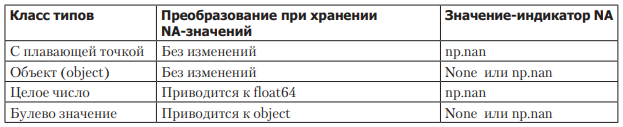

Имейте в виду, что строковые данные в библиотеке Pandas всегда хранятся с типом
данных (dtype) object.

# Операции над пустыми значениями

Библиотека Pandas рассматривает значения None и NaN как взаимозаменяемые средства указания на отсутствующие или пустые значения. 

Существует несколько удобных методов для обнаружения, удаления и замены пустых значений в структурах данных библиотеки Pandas, призванных упростить работу с ними.

##### ● isnull() — генерирует булеву маску для отсутствующих значений.

##### ● notnull() — противоположность метода isnull().

##### ● dropna() — возвращает отфильтрованный вариант данных.

##### ● fillna() — возвращает копию данных, в которой пропущенные значения заполнены или восстановлены

Завершим раздел кратким рассмотрением и демонстрацией этих методов.

### Выявление пустых значений

У структур данных библиотеки Pandas имеются два удобных метода для выявления пустых значений: isnull() и notnull(). 

Каждый из них возвращает булеву маску для данных. Например:

In [163]:
import pandas as pd
import numpy as np
data = pd.Series([1, np.nan, 'hello', None])
data.isnull()


0    False
1     True
2    False
3     True
dtype: bool

Как уже упоминалось в разделе «Индексация и выборка данных», булевы маски можно использовать непосредственно в качестве индекса объектов
Series или DataFrame:

In [164]:
data[data.notnull()]

0        1
2    hello
dtype: object

Аналогичные булевы результаты дает использование методов isnull() и notnull() для объектов DataFrame.


In [165]:
area = pd.Series({'Alaska': 1723337, 
                  'Texas': None,
                  'California': 423967}, 
                 name='area')
population = pd.Series({'California': 38332521, 
                        'Texas': 26448193,
                        'New York': np.nan}, 
                       name='population')

In [166]:
df = pd.DataFrame({'area':area, 'population': population})
df

,area,population
Alaska,1723337.0,NaN
California,423967.0,38332521.0
New York,NaN,NaN
Texas,NaN,26448193.0


In [ ]:
df.isnull()

In [ ]:
df.notnull()

In [ ]:
df[df.notnull()]

### Удаление пустых значений

Помимо продемонстрированного выше маскирования, существуют удобные методы: dropna() (отбрасывающий NA-значения) и fillna() (заполняющий NAзначения). 

Для объекта Series результат вполне однозначен:

In [ ]:
data.dropna()

In [ ]:
df.dropna()

В случае объектов DataFrame существует несколько параметров. 

Рассмотрим следующий объект DataFrame:

In [ ]:
df1 = pd.DataFrame([[1, np.nan, 2],
                    [2, 3, 5],
                    [np.nan, 4, 6]])
df1

Нельзя выбросить из DataFrame отдельные значения, только целые строки или столбцы. 

В зависимости от приложения может понадобиться тот или иной вариант, так что функция dropna() предоставляет для случая объектов DataFrame несколько параметров.

По умолчанию dropna() отбрасывает все строки, в которых присутствует хотя бы одно пустое значение:

In [ ]:
 df1.dropna()


В качестве альтернативы можно отбрасывать NA-значения по разным осям: задание параметра axis=1 отбрасывает все столбцы, содержащие хотя бы одно пустое значение:

In [ ]:
df1.dropna(axis=1)

In [ ]:
df1.dropna(axis='columns')

Однако при этом отбрасываются также и некоторые «хорошие» данные. 

Возможно, вам захочется отбросить строки или столбцы, все значения (или большинство) в которых представляют собой NA. 

Такое поведение можно задать с помощью параметров how и thresh, обеспечивающих точный контроль допустимого количества пустых значений.

По умолчанию how='any', то есть отбрасываются все строки или столбцы (в зависимости от ключевого слова axis), содержащие хоть одно пустое значение. 

Можно также указать значение how='all', при нем будут отбрасываться только строки/столбцы, все значения в которых пустые:

In [ ]:
df

In [ ]:
df.dropna(how='any')

In [ ]:
df.dropna(how='all')

In [ ]:
df.dropna(thresh=0)

In [ ]:
df.dropna(thresh=1)

In [ ]:
df.dropna(thresh=2)


In [ ]:
df1

In [ ]:
df1.dropna(how='all')

In [ ]:
df1.dropna(how='any')

In [ ]:
#делаем колонку из NaN
df1[3] = np.nan
df

In [ ]:
df1

In [ ]:
df1.dropna(axis='columns', how='all')

Для более точного контроля можно задать с помощью параметра thresh минимальное количество непустых значений для строки/столбца, при котором он не отбрасывается:

In [ ]:
df1.dropna(axis='rows', thresh=3)

В данном случае отбрасываются первая и последняя строки, поскольку в них содержится только по два непустых значения.

### Заполнение пустых значений

Иногда предпочтительнее вместо отбрасывания пустых значений заполнить их каким-то допустимым значением. 

Это значение может быть фиксированным, например нулем, или интерполированным или восстановленным на основе «хороших» данных значением. 

Это можно сделать путем замены в исходных данных,
используя результат метода isnull() в качестве маски. 

Но это настолько распространенная операция, что библиотека Pandas предоставляет метод fillna(), возвращающий копию массива с замененными пустыми значениями.
Рассмотрим следующий объект Series:

In [ ]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
data

Можно заполнить NA-элементы одним фиксированным значением, например, нулями:

In [ ]:
data.fillna(0)

Можно задать параметр заполнения по направлению «вперед», копируя предыдущее значение в следующую ячейку:

In [ ]:
# заполнение по направлению «вперед»
data.fillna(method='ffill')

In [ ]:
# заполнение средними значениями по столбцу при axis = 0, по строке при axis = 1
data.fillna(data.mean())

Для объектов DataFrame опции аналогичны, но в дополнение можно задать ось, по которой будет выполняться заполнение:

In [ ]:
df1

In [ ]:
df1.fillna(method='ffill', axis=1)

In [ ]:
df1

In [ ]:
df1.fillna(method='ffill', axis=0)

In [ ]:
df1

In [ ]:
# заполнение средними значениями по колонкам
df1.fillna(df1.mean())

In [ ]:
df1

In [ ]:
# заполнение средними значениями по строке
df1.fillna(df1.mean(axis=1))

Обратите внимание, что если при заполнении по направлению «вперед» предыдущего значения нет, то NA-значение остается незаполненным.

### Домашнее задание

### Задача 1: Создайте DataFrame из 2-х Series. Выявите пустые значения в этом DataFrame, используя методы:

### df.isnull()

### df.notnull()

### df[df.notnull()]

data_a = pd.Series({'AAA': None, 
                  
                  'FFF': 111,
                  
                  'NNN': 222}, 
                 
                  name='DATA_A')

data_b = pd.Series({'AAA': 333, 
                    
                    'FFF': np.nan,
                    
                    'NNN': 777}, 
                    
                    name='population')

### Задача 2: Создайте DataFrame из 2-х Series. Удалите строки (столбцы) в этом DataFrame, используя методы:

### df.dropna()

data_a = pd.Series({'AAA': None, 
                  
                  'FFF': 111,
                  
                  'NNN': 222}, 
                   
                   name='DATA_A')

data_b = pd.Series({'AAA': 333, 
                    
                    'FFF': np.nan,
                        
                    'NNN': 777}, 
                    
                    name='DATA_B')

### Задача 3: Создайте DataFrame из 2-х Series. Заполните пропуски в этом DataFrame средним значением в столбце (строке), используя метод:

### df.fillna()

data_a = pd.Series({'AAA': 1, 
                  
                  'FFF': None,
                  
                  'NNN': 3}, 
                   
                   name='DATA_A')

data_b = pd.Series({'AAA': 4, 
                    
                    'FFF': 5,
                        
                    'NNN': np.nan}, 
                    
                    name='DATA_B')

# 5 lesson

# Lesson topic: Иерархическая индексация

До сих пор мы рассматривали главным образом одномерные и двумерные данные, находящиеся в объектах Series и DataFrame библиотеки Pandas. 

Часто бывает удобно выйти за пределы двух измерений и хранить многомерные данные, то есть данные, индексированные по более чем двум ключам. 

Хотя библиотека Pandas предоставляет объекты Panel и Panel4D, позволяющие нативным образом хранить трехмерные
и четырехмерные данные (см. врезку «Данные объектов Panel» на с. 178), на практике намного чаще используется иерархическая индексация (hierarchical indexing),
или мультииндексация (multi-indexing), для включения в один индекс нескольких уровней. 

При этом многомерные данные могут быть компактно представлены в уже привычных нам одномерных объектах Series и двумерных объектах DataFrame.

В этом разделе мы рассмотрим создание объектов MultiIndex напрямую, приведем соображения относительно индексации, срезов и вычисления статистических показателей по мультииндексированным данным, а также полезные методы для преобразования между простым и иерархически индексированным представлением данных.

Начнем с обычных импортов:

In [ ]:
import pandas as pd
import numpy as np

# Мультииндексированный объект Series

Рассмотрим, как можно представить двумерные данные в одномерном объекте Series. 

Для конкретики изучим ряд данных, в котором у каждой точки имеются символьный и числовой ключи.

### Плохой способ


Пускай нам требуется проанализировать данные о штатах за два разных года. 

Вам может показаться соблазнительным, воспользовавшись утилитами библиотеки Pandas, применить в качестве ключей кортежи языка Python:

In [ ]:
index = [('California', 2000), 
         ('California', 2010),
         ('New York', 2000), 
         ('New York', 2010),
         ('Texas', 2000), 
         ('Texas', 2010)]

populations = [33871648, 37253956, 18976457, 
               19378102, 20851820, 25145561]

pop = pd.Series(populations, index=index)
pop

При подобной схеме индексации появляется возможность непосредственно индексировать или выполнять срез ряда данных на основе такого мультииндекса:

In [ ]:
pop[('California', 2010):('Texas', 2000)]

Однако на этом удобство заканчивается. 

Например, при необходимости выбрать все значения из 2010 года придется проделать громоздкую (и потенциально медленную) очистку данных:

In [ ]:
pop[[i for i in pop.index if i[1] == 2010]]

Это хоть и приводит к желаемому результату, но гораздо менее изящно (и далеко не так эффективно), как использование синтаксиса срезов, столь полюбившегося нам в библиотеке Pandas.

### Лучший способ

В библиотеке Pandas есть лучший способ выполнения таких операций. 

Наша индексация, основанная на кортежах, по сути, является примитивным мультииндексом, и тип MultiIndex библиотеки Pandas как раз обеспечивает необходимые нам операции. 

Создать мультииндекс из кортежей можно следующим образом:


In [ ]:
index = [('California', 2000), 
         ('California', 2010),
         ('New York', 2000), 
         ('New York', 2010),
         ('Texas', 2000), 
         ('Texas', 2010)]

populations = [33871648, 37253956, 18976457, 
               19378102, 20851820, 25145561]

pop = pd.Series(populations, index=index)
pop

In [ ]:
index = pd.MultiIndex.from_tuples(index)
index

Обратите внимание, что MultiIndex содержит несколько уровней (levels) индексации. 

В данном случае названия штатов и годы, а также несколько кодирующих эти уровни меток (labels) для каждой точки данных.

Проиндексировав заново наши ряды данных с помощью MultiIndex, мы увидим иерархическое представление данных:


In [ ]:
pop = pop.reindex(index)
pop

Здесь первые два столбца представления объекта Series отражают значения мультииндекса, а третий столбец — данные. 

Обратите внимание, что в первом столбце отсутствуют некоторые элементы: в этом мультииндексном представлении все пропущенные элементы означают то же значение, что и строкой выше.

Теперь для выбора всех данных, второй индекс которых равен 2010, можно просто
воспользоваться синтаксисом срезов библиотеки Pandas:

In [ ]:
pop.index

In [ ]:
pop[:, 2010]

Результат представляет собой массив с одиночным индексом и только теми ключами, которые нас интересуют. 

Такой синтаксис намного удобнее (а операция выполняется гораздо быстрее!), чем мультииндексное решение на основе кортежей, с которого мы начали. 

Сейчас мы обсудим подробнее подобные операции индексации над иерархически индексированными данными.

# Мультииндекс как дополнительное измерение

Мы могли с легкостью хранить те же самые данные с помощью простого объекта DataFrame с индексом и метками столбцов. 

На самом деле библиотека Pandas создана
с учетом этой равнозначности. 

Метод unstack() может быстро преобразовать мультииндексный объект Series в индексированный обычным образом объект DataFrame:


In [ ]:
import pandas as pd
index = [('California', 2000), 
         ('California', 2010),
         ('New York', 2000), 
         ('New York', 2010),
         ('Texas', 2000), 
         ('Texas', 2010)]

populations = [33871648, 37253956, 18976457, 
               19378102, 20851820, 25145561]

pop = pd.Series(populations, index=index)
pop

In [ ]:
index = pd.MultiIndex.from_tuples(index)
index

In [ ]:
pop = pop.reindex(index)
pop

In [ ]:
# метод unstack() из серии мультииндекса создает датафрейм с
#колонками соответствующими второму индексу
pop_df = pop.unstack()
pop_df

Как и можно ожидать, метод stack() выполняет противоположную операцию:

In [ ]:
pop_df.stack()


Почему вообще имеет смысл возиться с иерархической индексацией? 

Причина проста: аналогично тому, как мы использовали мультииндексацию для представления двумерных данных в одномерном объекте Series, можно использовать ее
для представления данных с тремя или более измерениями в объектах Series или DataFrame. 

Каждый новый уровень в мультииндексе представляет дополнительное измерение данных. 

Благодаря использованию этого свойства мы получаем намного больше свободы в представлении типов данных. 

Например, нам может понадобиться добавить в демографические данные по каждому штату за каждый год еще один столбец (допустим, количество населения младше 18 лет). 

Благодаря типу MultiIndex это сводится к добавлению еще одного столбца в объект DataFrame:

In [ ]:
pop_df = pd.DataFrame({'total': pop, 
                       'under18': [9267089, 9284094, 
                                   4687374, 4318033,
                                   5906301, 6879014]})
pop_df

Помимо этого, все универсальные функции и остальная функциональность, обсуждавшаяся в разделе «Операции над данными в библиотеке Pandas» этой главы, также прекрасно работают с иерархическими индексами. 

В следующем фрагменте кода мы вычисляем по годам долю населения младше 18 лет на основе вышеприведенных данных:

In [ ]:
f_u18 = pop_df['under18'] / pop_df['total']
f_u18.unstack()

Это дает нам возможность легко и быстро манипулировать даже многомерными данными и исследовать их.

### Методы создания мультииндексов


Наиболее простой метод создания мультииндексированного объекта Series или DataFrame — передать в конструктор список из двух или более индексных массивов.
Например:

In [ ]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.rand(4, 2),
index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
columns=['data1', 'data2'])
df

Вся работа по созданию мультииндекса выполняется в фоновом режиме.

Если передать словарь с соответствующими кортежами в качестве ключей, библиотека Pandas автоматически распознает такой синтаксис и будет по умолчанию
использовать мультииндекс:


In [ ]:
data = {('California', 2000): 33871648,
        ('California', 2010): 37253956,
        ('Texas', 2000): 20851820,
        ('Texas', 2010): 25145561,
        ('New York', 2000): 18976457,
        ('New York', 2010): 19378102}
pd.Series(data)

Тем не менее иногда бывает удобно создавать объекты MultiIndex явным образом.

Далее мы рассмотрим несколько методов для этого.


### Явные конструкторы для объектов MultiIndex

При формировании индекса для большей гибкости можно воспользоваться имеющимися в классе pd.MultiIndex конструкторами-методами класса. 

Например, можно сформировать объект MultiIndex из простого списка массивов, задающих значения индекса в каждом из уровней:

In [ ]:
 pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

Или из списка кортежей, задающих все значения индекса в каждой из точек:

In [ ]:
 pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])

Или из декартова произведения обычных индексов:

In [ ]:
pd.MultiIndex.from_product([['a', 'b'], [1, 2]])

Можно сформировать объект MultiIndex непосредственно с помощью его внутреннего представления, передав в конструктор levels (список списков, содержащих
имеющиеся значения индекса для каждого уровня) и labels (список списков меток):

Любой из этих объектов можно передать в качестве аргумента метода index при создании объектов Series или DataFrame или методу reindex уже существующих объектов Series или DataFrame.

### Названия уровней мультииндексов

Иногда бывает удобно задать названия для уровней объекта MultiIndex. 

Сделать это можно, передав аргумент names любому из вышеперечисленных конструкторов класса MultiIndex или задав значения атрибута names постфактум:

In [ ]:
pop.index.names = ['state', 'year']
pop

В случае более сложных наборов данных такой способ дает возможность не терять из виду, что означают различные значения индекса.

### Мультииндекс для столбцов

В объектах DataFrame строки и столбцы полностью симметричны, и у столбцов, точно так же, как и у строк, может быть несколько уровней индексов. 

Рассмотрим следующий пример, представляющий собой имитацию неких (в чем-то достаточно реалистичных) медицинских данных:

In [ ]:
# Иерархические индексы и столбцы
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]], 
                                   names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], 
                                      ['HR', 'Temp']],
names=['subject', 'type'])

# Создаем имитационные данные
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37
# Создаем объект DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

Как видим, мультииндексация как строк, так и столбцов может оказаться чрезвычайно удобной. 

По сути дела, это четырехмерные данные со следующими измерениями: субъект, измеряемый параметр, год и номер посещения. 

При наличии этого мы можем, например, индексировать столбец верхнего уровня по имени человека и получить объект DataFrame, содержащий информацию только об этом человеке:

In [ ]:
health_data['Guido']

Для сложных записей, содержащих несколько маркированных неоднократно измеряемых параметров для многих субъектов (людей, стран, городов и т. д.), будет исключительно удобно использовать иерархические строки и столбцы!

### Домашнее задание

### Задача 1: Cформируйте объект MultiIndex из простого списка массивов, задающих значения индекса в каждом из уровней:

[['SPb', 'SPb', 'SPb', 'Moscow', 'Moscow', 'Moscow'], [10, 20, 30, 10, 20, 30]]

### Задача 2: Cформируйте объект MultiIndex из списка кортежей:

[('SPb', 10), ('SPb', 20), ('Moscow', 10), ('Moscow', 20), ('Kazan', 10), ('Kazan', 20)]

### Задача 3: Cформируйте объект MultiIndex из декартова произведения обычных индексов:

[['SPb', 'Moscow', 'Kazan'], [1000, 2000, 3000]]

# 6 lesson

# Lesson topic: Иерархическая индексация. Индексация и срезы по мультииндексу

Объект MultiIndex спроектирован так, чтобы индексация и срезы по мультииндексу были интуитивно понятны, особенно если думать об индексах как о дополнительных измерениях.

Изучим сначала индексацию мультииндексированного
объекта Series, а затем мультииндексированного объекта DataFrame.

### Мультииндексация объектов Series

Рассмотрим мультииндексированный объект Series, содержащий количество населения по штатам:

In [ ]:
pop

Обращаться к отдельным элементам можно путем индексации с помощью нескольких термов:

In [ ]:
pop['California', 2000]

Объект MultiIndex поддерживает также частичную индексацию (partial indexing), то есть индексацию только по одному из уровней индекса. 

Результат — тоже объект Series, с более низкоуровневыми индексами:

In [ ]:
pop['California']

Возможно также выполнение частичных срезов, если мультииндекс отсортирован (см. обсуждение в пункте «Отсортированные и неотсортированные индексы» подраздела «Перегруппировка мультииндексов» данного раздела):

In [ ]:
pop.loc['California':'New York']

С помощью отсортированных индексов можно выполнять частичную индексацию по нижним уровням, указав пустой срез в первом индексе:

In [ ]:
pop[:, 2000]

Другие типы индексации и выборки (обсуждаемые в разделе «Индексация и выборка данных» этой главы) тоже работают.

Выборка данных на основе булевой маски:

In [ ]:
pop[pop > 22000000]

Выборка на основе «прихотливой» индексации:

In [ ]:
pop[['California', 'Texas']]

### Мультииндексация объектов DataFrame

Мультииндексированные объекты DataFrame ведут себя аналогичным образом.

Рассмотрим наш модельный медицинский объект DataFrame:

In [ ]:
health_data

In [ ]:
# Иерархические индексы и столбцы
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]], 
                                   names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], 
                                      ['HR', 'Temp']],
names=['subject', 'type'])

# Создаем имитационные данные
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37
# Создаем объект DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

Не забывайте, что в объектах DataFrame основными являются столбцы, и используемый для мультииндексированных Series синтаксис применяется тоже к столбцам.

Например, можно узнать пульс Гвидо с помощью простой операции:

In [ ]:
health_data['Guido', 'HR']

Как и в случае с одиночным индексом, можно использовать индексаторы loc, iloc и ix, описанные в разделе «Индексация и выборка данных» этой главы. 

Например:


In [ ]:
health_data.iloc[:2, :2]

Эти индексаторы возвращают массивоподобное представление исходных двумерных данных, но в каждом отдельном индексе в loc и iloc можно указать кортеж из
нескольких индексов. Например:

In [ ]:
health_data.loc[:, ('Bob', 'HR')]

Работать со срезами в подобных кортежах индексов не очень удобно: 

попытка создать срез в кортеже может привести к синтаксической ошибке:

In [ ]:
health_data.loc[(:, 1), (:, 'HR')]

Избежать этого можно, сформировав срез явным образом с помощью встроенной функции Python slice(), но лучше в данном случае использовать объект IndexSlice, предназначенный библиотекой Pandas как раз для подобной ситуации.
Например:

In [ ]:
idx = pd.IndexSlice
health_data.loc[idx[:, 1], idx[:, 'HR']]

Существует множество способов взаимодействия с данными в мультииндексированных объектах Series и DataFrame, и лучший способ привыкнуть к ним — начать с ними экспериментировать!

# Перегруппировка мультииндексов

Один из ключей к эффективной работе с мультииндексированными данными —
умение эффективно преобразовывать данные. 

Существует немало операций, сохраняющих всю информацию из набора данных, но преобразующих ее ради удобства
проведения различных вычислений. 

Мы рассмотрели небольшой пример этого с методами stack() и unstack(), но есть гораздо больше способов точного контроля над перегруппировкой данных между иерархическими индексами и столбцами.

### Отсортированные и неотсортированные индексы

Большинство операций срезов с мультииндексами завершится ошибкой, если индекс не отсортирован. 

Рассмотрим этот вопрос.
Начнем с создания простых мультииндексированных данных, индексы в которых не отсортированы лексикографически:

In [ ]:
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
data = pd.Series(np.random.rand(6), index=index)
data.index.names = ['char', 'int']
data

Если мы попытаемся выполнить частичный срез этого индекса, то получим ошибку:

In [ ]:
try:
    data['a':'b']
except KeyError as e:
    print(type(e))
    print(e)

Хотя из сообщения об ошибке это не вполне понятно, ошибка генерируется, потому что объект MultiIndex не отсортирован. 

По различным причинам частичные срезы и другие подобные операции требуют, чтобы уровни мультииндекса были
отсортированы (лексикографически упорядочены). 

Библиотека Pandas предоставляет множество удобных инструментов для выполнения подобной сортировки.

В качестве примеров можем указать методы sort_index() и sortlevel() объекта DataFrame. 

Мы воспользуемся простейшим из них — методом sort_index():

In [ ]:
data

In [ ]:
data = data.sort_index()
data

После подобной сортировки индекса частичный срез будет выполняться как положено:

In [ ]:
data['a':'b']


### Выполнение над индексами операций stack и unstack

Существует возможность преобразовывать набор данных из вертикального мультииндексированного в простое двумерное представление, при необходимости
указывая требуемый уровень:

In [ ]:
pop

In [ ]:
pop.unstack(level=0)

In [ ]:
pop.unstack(level=1)

Методу unstack() противоположен по действию метод stack(), которым можно воспользоваться, чтобы получить обратно исходный ряд данных:

In [ ]:
pop.unstack().stack()

### Создание и перестройка индексов

Еще один способ перегруппировки иерархических данных — преобразовать метки индекса в столбцы с помощью метода reset_index. 

Результатом вызова этого метода для нашего ассоциативного словаря населения будет объект DataFrame со столбцами state (штат) и year (год), содержащими информацию, ранее находившуюся в индексе. 

Для большей ясности можно при желании задать название для представленных в виде столбцов данных:

In [ ]:
pop

In [ ]:
pop.index

In [ ]:
pop_flat = pop.reset_index(name='population')
pop_flat

При работе с реальными данными исходные входные данные очень часто выглядят подобным образом, поэтому удобно создать объект MultiIndex из значений столбцов. 

Это можно сделать с помощью метода set_index объекта DataFrame, возвращающего мультииндексированный объект DataFrame:

In [ ]:
pop_flat.set_index(['state', 'year'])

На практике, я полагаю, этот тип перестройки индекса — один из самых удобных паттернов при работе с реальными наборами данных.

### Агрегирование по мультииндексам

В библиотеке Pandas имеются встроенные методы для агрегирования данных, например mean(), sum() и max(). 

В случае иерархически индексированных данных им
можно передать параметр level для указания подмножества данных, на котором будет вычисляться сводный показатель.

Например, вернемся к нашим медицинским данным:

In [ ]:
health_data

Допустим, нужно усреднить результаты измерений показателей по двум визитам в течение года. 

Сделать это можно путем указания уровня индекса, который мы хотели бы исследовать, в данном случае года (year):

In [ ]:
data_mean = health_data.mean()
data_mean

Далее, воспользовавшись ключевым словом axis, можно получить и среднее значение по уровням по столбцам:

In [ ]:
health_data.mean(axis=1)

Так, всего двумя строками кода мы смогли найти средний пульс и температуру по всем субъектам и визитам за каждый год. 

Такой синтаксис представляет собой сокращенную форму функциональности GroupBy, о которой мы поговорим в разделе «Агрегирование и группировка» главы 3. 

Хотя наш пример — всего лишь модель, структура многих реальных наборов данных аналогичным образом иерархична.

### Данные объектов Panel

В библиотеке Pandas есть еще несколько пока не охваченных нами структур данных,
а именно объекты pd.Panel и pd.Panel4D. 

Их можно рассматривать как соответственно трехмерное и четырехмерное обобщение (одномерной структуры) объекта
Series и (двумерной структуры) объекта DataFrame. 

Раз вы уже знакомы с индексацией данных в объектах Series и DataFrame и манипуляциями над ними, то использование объектов Panel и Panel4D не должно вызвать у вас затруднений. 

В частности, возможности индексаторов loc и iloc, обсуждавшихся в разделе «Индексация и выборка данных» текущей главы, с легкостью распространяются на эти структуры более высоких размерностей.

Мы не будем рассматривать многомерные структуры далее в данном тексте, поскольку, как я обнаружил, в большинстве случаев мультииндексация — удобное и концептуально простое представление для данных более высоких размерностей.

Помимо этого, многомерные данные по существу — плотное представление данных, в то время как мультииндексация — разреженное представление данных. 

По мере увеличения размерности плотное представление становится все менее эффективным для большинства реальных наборов данных. 

В некоторых специализированных приложениях, однако, эти структуры данных могут быть полезны. 

Если вы захотите узнать больше о структурах Panel и Panel4D, загляните в ссылки, приведенные в разделе «Дополнительные источники информации» данной главы.

### Домашнее задание

### Задача 1: Создайте Series под названием realization, используя index и sales:

index = [('aaa', 1), 
         ('aaa', 2),
         ('bbb', 1), 
         ('bbb', 2),
         ('ccc', 1), 
         ('ccc', 2)]

sales = [1000, 1500, 2000, 1200, 2100, 1700]

### Сделайте выборку данных на основе булевой маски: realization > 1500

### Задача 2: Coздайте объект DataFrame c Мультииндексацией, используя index, columns и data:

##### Иерархические индексы и столбцы
index = pd.MultiIndex.from_product([['Store_1', 'Store_2'], ['1st quarter', '2st quarter']], 
                                   
                                   names=['year', 'visit'])

columns = pd.MultiIndex.from_product([['Mr. Smith', 'Mrs. Watson', 'Mr. Goodwin'], 
                                      
                                    ['stocks', 'salesи']],
names=['manager', 'type'])

##### Создаем имитационные данные
data = np.round(np.random.randn(4, 6), 1)

### Задача 3: Создав DataFrame в Задаче 2, вычислите среднее значение по столбцам.

# 7 lesson

# Lesson topic: Объединение наборов данных: конкатенация и добавление в конец

Некоторые наиболее интересные исследования выполняются благодаря объединению различных источников данных. 

Эти операции могут включать в себя что угодно, начиная с простейшей конкатенации двух различных наборов данных до более сложных соединений и слияний в стиле баз данных, корректно обрабатывающих все возможные частичные совпадения наборов. 

Объекты Series и DataFrame созданы в расчете на подобные операции, и библиотека Pandas содержит функции и методы для быстрого и удобного выполнения таких манипуляций.

Мы рассмотрим простую конкатенацию объектов Series и DataFrame с помощью функции pd.concat, углубимся в реализованные в библиотеке Pandas более запутанные слияния и соединения, выполняемые в оперативной памяти.

Начнем с обычных импортов:

In [ ]:
import pandas as pd
import numpy as np

Для удобства опишем следующую функцию, создающую объект DataFrame определенной формы, которая нам пригодится в дальнейшем:

In [ ]:
def make_df(cols, ind):
    """Быстро создаем объект DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)
# Экземпляр DataFrame
make_df('ABC', range(3))

### Напоминание: конкатенация массивов NumPy

Конкатенация объектов Series и DataFrame очень похожа на конкатенацию массивов библиотеки NumPy, которую можно осуществить посредством функции np.concatenate, обсуждавшейся в разделе «Введение в массивы библиотеки
NumPy» главы 2. Напомним, что таким образом можно объединять содержимое двух или более массивов в один:


In [ ]:
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x, y, z])

Первый аргумент данной функции — список или кортеж объединяемых массивов.

Кроме того, она принимает на входе ключевое слово axis, дающее возможность задавать ось, по которой будет выполняться конкатенация:

In [ ]:
x = [[1, 2], [3, 4]]
np.concatenate([x, x], axis=1)

In [ ]:
x = [[1, 2], [3, 4]]
np.concatenate([x, x], axis=0)

### Простая конкатенация с помощью метода pd.concat

В библиотеке Pandas имеется функция, pd.concat(), синтаксис которой аналогичен функции np.concatenate, однако она содержит множество параметров, которые мы
вскоре обсудим:

# Сигнатура функции pd.concat в библиотеке Pandas v0.18
pd.concat(objs, axis=0, 
          
          join='outer', join_axes=None, 
          
          ignore_index=False,keys=None, 
          
          levels=None, names=None, 
          
          verify_integrity=False,copy=True)

Функцию pd.concat можно использовать для простой конкатенации объектов Series или DataFrame аналогично тому, как функцию np.concatenate() можно
применять для простой конкатенации массивов:

In [ ]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])


Она также подходит для конкатенации объектов более высокой размерности, таких как DataFrame:

In [ ]:
df1 = make_df('AB', [1, 2])
df1

In [ ]:
df2 = make_df('AB', [3, 4])
df2

In [ ]:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
print(pd.concat([df1, df2]))

По умолчанию конкатенация происходит в объекте DataFrame построчно, то есть axis=0. 

Аналогично функции np.concatenate() функция pd.concat() позволяет указывать ось, по которой будет выполняться конкатенация. Рассмотрим следующий пример:

In [ ]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
print(df3); print(df4); print('-----------')
print(pd.concat([df3, df4], axis='columns'))

Мы могли задать ось и эквивалентным образом: axis=1, здесь же мы использовали более интуитивно понятный вариант axis='columns'.


### Дублирование индексов

Важное различие между функциями np.concatenate() и pd.concat() состоит в том, что конкатенация из библиотеки Pandas сохраняет индексы, даже если
в результате некоторые индексы будут дублироваться.

Рассмотрим следующий пример:

In [ ]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index # Дублируем индексы!
print(x); 
print('--------------------')
print(y); 
print('--------------------')
print(pd.concat([x, y]))

Обратите внимание на повторяющиеся индексы. Хотя в объектах DataFrame это допустимо, подобный результат часто может быть нежелателен. 

Функция pd.concat() предоставляет нам несколько способов решения этой проблемы.

Перехват повторов как ошибки. 

Если вам нужно просто гарантировать, что индексы в возвращаемом функцией pd.concat() результате не перекрываются, можно задать флаг verify_integrity. 

В случае равного True значения этого флага конкатенация приведет к генерации ошибки при наличии дублирующихся индексов. 

Вот пример, в котором мы для большей ясности перехватываем и выводим в консоль сообщение об ошибке:

In [ ]:
try:
    pd.concat([x, y], verify_integrity=True)
except ValueError as e:
    print("ValueError:", e)

Игнорирование индекса. 

Иногда индекс сам по себе не имеет значения и лучше
его просто проигнорировать. 

Для этого достаточно установить флаг ignore_index.

В случае равного True значения этого флага конкатенация приведет к созданию нового целочисленного индекса для итогового объекта Series:

In [ ]:
print(x)
print('--------------------')
print(y)
print('--------------------')
print(pd.concat([x, y], ignore_index=True))

Добавление ключей мультииндекса. 

Еще один вариант — воспользоваться параметром keys для задания меток для источников данных. 

Результатом будут иерархически индексированные ряды, содержащие данные:

In [ ]:
print(x)
print('--------------------')
print(y)
print('--------------------')
print(pd.concat([x, y], keys=['x', 'y']))

In [ ]:
print(x)
print('--------------------')
print(y)
print('--------------------')
print(pd.concat([x, y], keys=['x']))

Результат представляет собой мультииндексированный объект DataFrame, так что мы сможем воспользоваться описанным в разделе «Иерархическая индексация»
этой главы, чтобы преобразовать эти данные в требуемое нам представление.

### Конкатенация с использованием соединений

В рассматриваемых примерах в основном производится конкатенация объектов DataFrame с общими названиями столбцов. 

На практике у данных из разных источников могут быть различные наборы имен столбцов. 

На этот случай у функции pd.concat() имеется несколько опций. 

Изучим объединение следующих двух объектов DataFrame, у которых столбцы (но не все!) называются одинаково:

In [ ]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
print(df5)
print('--------------------')
print(df6)
print('--------------------')
print(pd.concat([df5, df6]))

По умолчанию элементы, данные для которых отсутствуют, заполняются NAзначениями. 

Чтобы поменять это поведение, можно указать одну из нескольких опций для параметров join и join_axes функции конкатенации. 

По умолчанию соединение — объединение входных столбцов (join='outer'), но есть возможность поменять это поведение на пересечение столбцов с помощью опции
join='inner':

In [ ]:
print(df5)
print('--------------------')
print(df6)
print('--------------------')
print(pd.concat([df5, df6], join='inner'))


In [ ]:
print(df5)
print('--------------------')
print(df6)
print('--------------------')
print(pd.concat([df5, df6], join='outer'))

Различные сочетания опций функции pd.concat() обеспечивают широкий диапазон возможных поведений при соединении двух наборов данных. 

Не забывайте об этом при использовании ее для ваших собственных данных.

В следующем разделе мы рассмотрим другой подход к объединению данных из нескольких источников, обладающий еще более широкими возможностями: выполнение слияний/объединений в стиле баз данных с помощью функции pd.merge.

Для получения дополнительной информации о методах concat(), append() и относящейся к ним функциональности см. раздел Merge, Join and Concatenate («Слияние, соединение и конкатенация», http://pandas.pydata.org/pandas-docs/stable/merging.
html) документации библиотеки Pandas.

### Домашнее задание

### Задача 1: выполните конкатенацию 2-х Series:

ser1 = pd.Series(['SPb', 'Mos', 'Kaz'], index=[1, 2, 3])

ser2 = pd.Series(['Nov', 'Ekat', 'Vlad'], index=[4, 5, 6])

### Задача 2: выполните конкатенацию 2-х DataFrame по столбцам:

list1, list2, list3 = [1, 2], [3, 4], [5, 6]

df1 = pd.DataFrame({'A': list1, 'B': list2, 'C': list3})

list4, list5, list6 = [10, 20], [30, 40], [50, 60]

df2 = pd.DataFrame({'A': list1, 'B': list2, 'C': list3})

### Задача 3: выполните конкатенацию 2-х DataFrame по строкам с помощью опции join='inner':

list1, list2, list3 = [1, 2], [3, 4], [5, 6]

df1 = pd.DataFrame({'A': list1, 'B': list2, 'C': list3})

list4, list5, list6 = [10, 20], [30, 40], [50, 60]

df2 = pd.DataFrame({'B': list1, 'C': list2, 'D': list3})

# 8 lesson

# Lesson topic: Объединение наборов данных: слияние и соединение

Одно из важных свойств библиотеки Pandas — ее высокопроизводительные, выполняемые в оперативной памяти операции соединения и слияния. 

Если вы когдалибо работали с базами данных, вам должен быть знаком такой вид взаимодействия
с данными. 

Основной интерфейс для них — функция pd.merge. 

Несколько примеров ее работы на практике мы рассмотрим далее.

### Реляционная алгебра

Реализованное в методе pd.merge поведение представляет собой подмножество того, что известно под названием «реляционная алгебра» (relational algebra). 

Реляционная алгебра — формальный набор правил манипуляции реляционными данными, формирующий теоретические основания для имеющихся в большинстве
баз данных операций. 

Сила реляционного подхода состоит в предоставлении им
нескольких простейших операций — своеобразных «кирпичиков» для построения более сложных операций над любым набором данных. 

При наличии эффективно реализованного в базе данных или другой программе подобного базового набора
операций можно выполнять широкий диапазон весьма сложных составных операций.

Библиотека Pandas реализует несколько из этих базовых «кирпичиков» в функции pd.merge() и родственном ей методе join() объектов Series и DataFrame. 

Они обеспечивают возможность эффективно связывать данные из различных источников.

## Виды соединений

Функция pd.merge() реализует множество типов соединений: «один-к-одному», «многие-к-одному» и «многие-ко-многим». 

Все эти три типа соединений доступны через один и тот же вызов pd.merge(), тип выполняемого соединения зависит от формы входных данных. 

Ниже мы рассмотрим примеры этих трех типов слияний
и обсудим более подробно имеющиеся параметры.

### Соединения «один-к-одному»

Простейший тип выражения слияния — соединение «один-к-одному», во многом напоминающее конкатенацию по столбцам, которую мы изучили в разделе «Объединение наборов данных: конкатенация и добавление в конец» этой главы.

В качестве примера рассмотрим следующие два объекта DataFrame, содержащие информацию о нескольких служащих компании:

In [ ]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})

df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'], 
                    'hire_date': [2004, 2008, 2012, 2014]})
print(df1)
print('--------------------')
print(df2)

Чтобы объединить эту информацию в один объект DataFrame, воспользуемся функцией pd.merge():

In [ ]:
df3 = pd.merge(df1, df2)
df3

Функция pd.merge() распознает, что в обоих объектах DataFrame имеется столбец employee, и автоматически выполняет соединение, используя этот столбец в качестве ключа. 

Результатом слияния становится новый объект DataFrame, объединяющий информацию из двух входных объектов. 

Обратите внимание, что порядок записей в столбцах не обязательно сохраняется: в данном случае сортировка столбца employee различна в объектах df1 и df2 и функция pd.merge() обрабатывает эту ситуацию
корректным образом. 

Кроме того, не забывайте, что слияние игнорирует индекс, за исключением особого случая слияния по индексу  (см. пункт «Ключевые слова left_index и right_index» подраздела «Задание ключа слияния» данного раздела).

### Соединения «многие-к-одному»

«Многие-к-одному» — соединения, при которых один из двух ключевых столбцов содержит дублирующиеся значения. 

В случае соединения «многие-к-одному»
в итоговом объекте DataFrame эти дублирующиеся записи будут сохранены. 

Рассмотрим следующий пример соединения «многие-к-одному»:

In [ ]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
print(df3)
print('--------------------')
print(df4)
print('--------------------')
print(pd.merge(df3, df4))

В итоговом объекте DataFrame имеется дополнительный столбец с информацией о руководителе (supervisor) с повторением информации в одном или нескольких
местах в соответствии с вводимыми данными.

### Соединения «многие-ко-многим»

Соединения «многие-ко-многим» семантически несколько более сложны, но тем не менее четко определены. 

Если столбец ключа как в левом, так и в правом массивах содержит повторяющиеся значения, результат окажется слиянием типа «многие ко-многим». 

Рассмотрим следующий пример, в котором объект DataFrame отражает один или несколько навыков, соответствующих конкретной группе.

Выполнив соединение «многие-ко-многим», можно выяснить навыки каждого конкретного человека:

In [ ]:
df5 = pd.DataFrame({'group': ['Accounting', 
                              'Accounting', 
                              'Engineering', 
                              'Engineering',
                              'HR', 
                              'HR'],
                    'skills': ['math', 
                               'spreadsheets', 
                               'coding',
                               'linux',
                               'spreadsheets', 
                               'organization']})

print(df1)
print('--------------------')
print(df5)
print('--------------------')
print(pd.merge(df1, df5))

Эти три типа соединений можно использовать и в других инструментах библиотеки
Pandas, что дает возможность реализовать широкий диапазон функциональности.

Однако на практике наборы данных редко оказываются такими же «чистыми», как
те, с которыми мы имели дело. 

В следующем разделе мы рассмотрим параметры метода pd.merge(), позволяющие более тонко описывать желаемое поведение операций соединения.

## Задание ключа слияния

Мы рассмотрели поведение метода pd.merge() по умолчанию: он выполняет поиск в двух входных объектах соответствующих названий столбцов и использует найденное в качестве ключа. 

Однако зачастую имена столбцов не совпадают добуквенно точно, и в методе pd.merge() имеется немало параметров для такой ситуации.

### Ключевое слово on

Проще всего указать название ключевого столбца с помощью ключевого слова on, в котором указывается название или список названий столбцов:

In [ ]:
print(df1)
print('--------------------')
print(df2)
print('--------------------')
print(pd.merge(df1, df2, on='employee'))


Этот параметр работает только в том случае, когда в левом и правом объектах DataFrame имеется указанное название столбца.

### Ключевые слова left_on и right_on

Иногда приходится выполнять слияние двух наборов данных с различными именами столбцов. 

Например, у нас может быть набор данных, в котором столбец для имени служащего называется Name, а не Employee. 

В этом случае можно воспользоваться ключевыми словами left_on и right_on для указания названий двух нужных столбцов:

In [ ]:
df3 = pd.DataFrame({'name': ['Bob', 
                             'Jake', 
                             'Lisa', 
                             'Sue'], 
                    'salary': [70000, 
                               80000, 
                               120000, 
                               90000]})
print(df1)
print('--------------------')
print(df3)
print('--------------------')
print(pd.merge(df1, df3, left_on="employee", right_on="name"))


Результат этой операции содержит избыточный столбец, который можно при желании удалить. 

Например, с помощью имеющегося в объектах DataFrame метода drop():

In [ ]:
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)

### Ключевые слова left_index и right_index

Иногда удобнее вместо слияния по столбцу выполнить слияние по индексу. 

Допустим, у нас имеются следующие данные:

In [ ]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
print(df1a)
print('--------------------')
print(df2a)

Можно использовать индекс в качестве ключа слияния путем указания в методе pd.merge() 

флагов left_index и/или right_index:

In [ ]:
print(df1a)
print('--------------------')
print(df2a)
print('--------------------')
print(pd.merge(df1a, df2a, left_index=True, right_index=True))

Для удобства в объектах DataFrame реализован метод join(), выполняющий по умолчанию слияние по индексам:

In [ ]:
print(df1a)
print('--------------------')
print(df2a) 
print('--------------------')
print(df1a.join(df2a))

Если требуется комбинация слияния по столбцам и индексам, можно для достижения нужного поведения воспользоваться сочетанием флага left_index с параметром right_on или параметра left_on с флагом right_index:

In [ ]:
print(df1a)
print('--------------------')
print(df3)
print('--------------------')
print(pd.merge(df1a, df3, left_index=True, right_on='name'))

Все эти параметры работают и в случае нескольких индексов и/или столбцов, синтаксис для этого интуитивно понятен. 

Более подробную информацию по этому вопросу см. в разделе Merge, Join and Concatenate («Слияние, соединение и конкатенация», http://pandas.pydata.org/pandas-docs/stable/merging.html) документации
библиотеки Pandas.

# Задание операций над множествами для соединений

Во всех предыдущих примерах мы игнорировали один важный нюанс выполнения соединения — вид используемой при соединении операции алгебры множеств. 

Это играет важную роль в случаях, когда какое-либо значение есть в одном ключевом столбце, но отсутствует в другом. 

Рассмотрим следующий пример:

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])

df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])

print(df6)
print('--------------------')
print(df7)
print('--------------------')
print(pd.merge(df6, df7))

Здесь мы слили воедино два набора данных, у которых совпадает только одна запись name: Mary. 

По умолчанию результат будет содержать пересечение двух входных множеств — внутреннее соединение (inner join). 

Можно указать это явным образом, с помощью ключевого слова how, имеющего по умолчанию значение 'inner':

In [ ]:
pd.merge(df6, df7, how='inner')

Другие возможные значения ключевого слова how: 'outer', 'left' и 'right'. 

Внешнее соединение (outer join) означает соединение по объединению входных столбцов и заполняет значениями NA все пропуски значений:

In [ ]:
print(df6)
print('--------------------')
print(df7)
print('--------------------')
print(pd.merge(df6, df7, how='outer'))

Левое соединение (left join) и правое соединение (right join) выполняют соединение по записям слева и справа соответственно. 

Например:

In [ ]:
print(df6)
print('--------------------')
print(df7)
print('--------------------')
print(pd.merge(df6, df7, how='left'))

Строки результата теперь соответствуют записям в левом из входных объектов.

In [ ]:
print(df6)
print('--------------------')
print(df7)
print('--------------------')
print(pd.merge(df6, df7, how='right'))

Опция how='right' работает аналогичным образом.

Все эти опции можно непосредственно применять ко всем вышеописанным типам соединений.

# Пересекающиеся названия столбцов: ключевое слово suffixes

Вам может встретиться случай, когда в двух входных объектах присутствуют конфликтующие названия столбцов. Рассмотрим следующий пример:

In [ ]:
df8 = pd.DataFrame({'name': ['Bob', 
                             'Jake', 
                             'Lisa', 
                             'Sue'], 
                    'rank': [1, 2, 3, 4]})

df9 = pd.DataFrame({'name': ['Bob', 
                             'Jake', 
                             'Lisa', 
                             'Sue'],
                    'rank': [3, 1, 4, 2]})
print(df8)
print('--------------------')
print(df9)
print('--------------------')
print(pd.merge(df8, df9, on="name"))


Поскольку в результате должны были быть два конфликтующих названия столбцов, функция слияния автоматически добавила в названия суффиксы _x и _y, чтобы обеспечить уникальность названий столбцов результата. 

Если подобное поведение, принятое по умолчанию, неуместно, можно задать пользовательские суффиксы
с помощью ключевого слова suffixes:

In [ ]:
print(df8)
print('--------------------')
print(df9)
print('--------------------')
print(pd.merge(df8, df9, on="name", suffixes=["_L", "_R"]))

Эти суффиксы будут работать для всех возможных вариантов соединений, в том числе и в случае нескольких пересекающихся по названию столбцов.

За более подробной информацией об этих вариантах загляните в раздел «Агрегирование и группировка» данной главы, в котором мы подробнее изучим реляционную алгебру, а также в раздел Merge, Join and Concatenate («Слияние, соединение и конкатенация», http://pandas.pydata.org/pandas-docs/stable/merging.html) документации библиотеки Pandas.

# Пример: данные по штатам США

Операции слияния и соединения чаще всего оказываются нужны при объединении данных из различных источников. 

Здесь мы рассмотрим пример с определенными данными по штатам США и их населению. 

Файлы данных можно найти по адресу
http://github.com/jakevdp/data-USstates/:

Посмотрим на эти наборы данных с помощью функции read_csv() библиотеки
Pandas:

In [ ]:
pop = pd.read_csv('data\\state-population.csv')
areas = pd.read_csv('data\\state-areas.csv')
abbrevs = pd.read_csv('data\\state-abbrevs.csv')

In [ ]:
print(pop.head())
print('--------------------')
print(areas.head())
print('--------------------')
print(abbrevs.head())

Допустим, нам нужно на основе этой информации отсортировать штаты и территорию США по плотности населения в 2010 году. 

Информации для этого у нас достаточно, но для достижения цели придется объединить наборы данных.

Начнем со слияния «многие-ко-многим», которое позволит получить полное имя штата в объекте DataFrame для населения. 

Выполнить слияние нужно на основе столбца state/region объекта pop и столбца abbreviation объекта abbrevs. 

Мы воспользуемся опцией how='outer', чтобы гарантировать, что не упустим никаких данных из-за несовпадения меток.

In [ ]:
merged = pd.merge(pop, abbrevs, 
                  how='outer', 
                  left_on='state/region', 
                  right_on='abbreviation')
merged.head(7)

In [ ]:
merged.columns

In [ ]:
# Удаляем дублирующуюся информацию
merged = merged.drop('abbreviation', axis=1) 
merged.head(7)

Следует проверить, не было ли каких-то несовпадений. 

Сделать это можно путем поиска строк с пустыми значениями:

In [ ]:
merged.isnull().any()


Часть информации о населении отсутствует, выясним, какая именно:

In [ ]:
merged[merged['population'].isnull()].head()

Похоже, что источник пустых значений по населению — Пуэрто-Рико, до 2000 года.

Вероятно, это произошло из-за того, что необходимых данных не было в первоисточнике.

Мы видим, что некоторые из новых значений столбца state тоже пусты, а значит, в ключе объекта abbrevs отсутствовали соответствующие записи! 

Выясним, для каких территорий отсутствуют соответствующие значения:

In [ ]:
merged.loc[merged['state'].isnull(), 'state/region'].unique()


In [ ]:
merged.loc[merged['state'].isnull(), 'state/region']

Все понятно: наши данные по населению включают записи для Пуэрто-Рико (PR) и США в целом (USA), отсутствующие в ключе аббревиатур штатов. 

Исправим это, вставив соответствующие записи:


In [ ]:
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
#посмотрим
merged.loc[merged['state'].isnull(), 'state/region'].unique()

In [ ]:
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'

In [ ]:
#посмотрим
merged.loc[merged['state'].isnull(), 'state/region'].unique()

In [ ]:
merged.isnull().any()

В столбце state больше нет пустых значений. Готово!

Теперь можно слить результат с данными по площади штатов с помощью аналогичной процедуры. 

После изучения имеющихся результатов становится понятно,
что нужно выполнить соединение по столбцу state в обоих объектах:

In [ ]:
merged.head()

In [ ]:
areas.head()

In [ ]:
final = pd.merge(merged, areas, on='state', how='left')
final.head()

Выполним снова проверку на пустые значения, чтобы узнать, были ли какие-то несовпадения:

In [ ]:
final.isnull().any()

В столбце area имеются пустые значения. Посмотрим, какие территории не были учтены:

In [ ]:
final['state'][final['area (sq. mi)'].isnull()].unique()

Видим, что наш DataFrame-объект areas не содержит площадь США в целом.

Мы могли бы вставить соответствующее значение (например, воспользовавшись суммой площадей всех штатов), но в данном случае мы просто удалим пустые значения, поскольку плотность населения США в целом нас сейчас не интересует:

In [ ]:
final.dropna(inplace=True)
final.head()

Теперь у нас есть все необходимые нам данные. 

Чтобы ответить на интересующий вопрос, сначала выберем часть данных, соответствующих 2010 году и всему населению. 

Воспользуемся функцией query() (для этого должен быть установлен пакет numexpr, см. раздел «Увеличение производительности библиотеки Pandas: eval() и query()» данной главы):

In [ ]:
data2010 = final.query("year == 2010 & ages == 'total'")
data2010.head()


Теперь вычислим плотность населения и выведем данные в соответствующем порядке. 

Начнем с переиндексации наших данных по штату, после чего вычислим результат:

In [ ]:
data2010.set_index('state', inplace=True)
density = data2010['population'] / data2010['area (sq. mi)']

In [ ]:
density.head()

In [ ]:
density.sort_values(ascending=False, inplace=True)
density.head()

Результат — список штатов США плюс Вашингтон (округ Колумбия) и Пуэрто-Рико, упорядоченный по плотности населения в 2010 году, в жителях на квадратную милю. 

Как видим, самая густонаселенная территория в этом наборе
данных — Вашингтон (округ Колумбия); 

среди штатов же самый густонаселенный — Нью-Джерси.

Можно также вывести окончание списка:

In [ ]:
density.tail()

Как видим, штатом с наименьшей плотностью населения, причем с большим отрывом от остальных, оказалась Аляска, насчитывающая в среднем одного жителя на квадратную милю.

Подобное громоздкое слияние данных — распространенная задача при ответе на вопросы, связанные с реальными источниками данных. 

Надеюсь, что этот пример дал вам представление, какими способами можно комбинировать вышеописанные
инструменты, чтобы почерпнуть полезную информацию из данных!

### Домашнее задание

### Задача 1: ### Задача 1: Выполните слияние 2-х DataFrame, используя функцию pd.merge(), метод df1.merge(df2):

zoo = pd.DataFrame([['elephant',1001, 500], ['elephant',1002, 600],['tiger',1003, 300], ['tiger',1004, 320], ['tiger',1005, 290],
                         
                         ['zebra',1006, 200], ['zebra',1007, 210], ['zebra',1008, 150], ['zebra',1009, 180], ['zebra',1010, 190],
                         
                         ['lion',1011, 420], ['lion',1012, 510], ['lion',1013, 530], ['lion',1014, 600],
                         
                         ['kangaroo',1015, 410], ['kangaroo',1016, 490]], columns=['animal', 'uniq_id', 'water_need'])

zoo_eats = pd.DataFrame([['elephant','vegetables'], ['tiger','meat'], 
                        
                        ['kangaroo','vegetables'], ['zebra','vegetables'], 
                        
                        ['giraffe','vegetables']], columns=['animal', 'food'])

### Задача 2: Выполните слияние 2-х DataFrame, используя функцию pd.merge(), метод df1.merge(df2), 

### при помощи ключевого слова on

### Задача 3: Выполните слияние 2-х DataFrame, используя функцию pd.merge(), метод df1.merge(df2), 

### используя ключевое слово how='right'

# 9 lesson

# Lesson topic: Агрегирование и группировка

Важная часть анализа больших данных — их эффективное обобщение: вычисление сводных показателей, например sum(), mean(), median(), min() и max(), в которых
одно число позволяет понять природу, возможно, огромного набора данных. 

В этом разделе мы займемся изучением сводных показателей в библиотеке Pandas, начиная с простых операций, подобных тем, с которыми мы уже имели дело при работе с массивами NumPy, и заканчивая более сложными операциями на основе понятия groupby.

### Данные о планетах

Воспользуемся набором данных «Планеты» (Planets), доступным через пакет Seaborn (см. раздел «Визуализация с помощью библиотеки Seaborn» главы 4).
Он включает информацию об открытых астрономами планетах, вращающихся вокруг других звезд, известных под названием внесолнечных планет или экзопланет (exoplanets). 

Скачать его можно с помощью команды пакета Seaborn:

In [ ]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

In [ ]:
planets.head()

Этот набор данных содержит определенную информацию о более чем 1000 экзопланет, открытых до 2014 года.

### Простое агрегирование в библиотеке Pandas

Ранее мы рассмотрели некоторые доступные для массивов NumPy возможности по агрегированию данных (см. раздел «Агрегирование: минимум, максимум и все, что
посередине» главы 2). 

Как и в случае одномерных массивов библиотеки NumPy,
для объектов Series библиотеки Pandas агрегирующие функции возвращают скалярное значение:

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

In [ ]:
ser.sum()


In [ ]:
ser.mean()


В случае объекта DataFrame по умолчанию агрегирующие функции возвращают сводные показатели по каждому столбцу:

In [ ]:
df = pd.DataFrame({'A': rng.rand(5), 'B': rng.rand(5)})
df

In [ ]:
df.mean()

Можно вместо этого агрегировать и по строкам, задав аргумент axis:

In [ ]:
df.mean(axis='columns') # если нужно найти средние значений каждой строки

In [ ]:
df.mean(axis=1)         # даёт аналогичный результат предыдущей ячейки

Объекты Series и DataFrame библиотеки Pandas содержат методы, соответствующие всем упомянутым в разделе «Агрегирование: минимум, максимум и все, что посередине» главы 2 распространенным агрегирующим функциям. 

В них есть удобный метод describe(), вычисляющий сразу несколько самых распространенных сводных показателей для каждого столбца и возвращающий результат.

Опробуем его на наборе данных «Планеты», пока удалив строки с отсутствующими значениями:

In [ ]:
planets.dropna().describe()

Эта возможность очень удобна для первоначального знакомства с общими характеристиками нашего набора данных. 

Например, мы видим в столбце year, что, хотя первая экзопланета была открыта еще в 1989 году, половина всех известных экзопланет открыта не ранее 2010 года. 

В значительной степени мы обязаны этим миссии «Кеплер», представляющей собой космический телескоп, специально разработанный для поиска затмений от планет, вращающих вокруг других звезд.
В табл. 3.3 перечислены основные встроенные агрегирующие методы библиотеки Pandas.

##### Список агрегирующих методов библиотеки Pandas

Агрегирующая функция                    Описание

##### ● count()                      Общее количество элементов

##### ● first(), last()              Первый и последний элементы

##### ● mean(), median()             Среднее значение и медиана

##### ● min(), max()                 Минимум и максимум

##### ● std(), var()                 Стандартное отклонение и дисперсия
                             
##### ● mad()                        Среднее абсолютное  отклонение

##### ● prod()                       Произведение всех элементов

##### ● sum()                        Сумма всех элементов

Для более глубокого исследования данных простых сводных показателей часто недостаточно. 

Следующий уровень обобщения данных — операция groupby, позволяющая быстро и эффективно вычислять сводные показатели по подмножествам данных.

# GroupBy: разбиение, применение, объединение

Простые агрегирующие функции дают возможность «прочувствовать» набор данных, но зачастую бывает нужно выполнить условное агрегирование по какой-либо
метке или индексу. 

Это действие реализовано в так называемой операции GroupBy.

Название group by («сгруппировать по») ведет начало от одноименной команды в языке SQL баз данных, но, возможно, будет понятнее говорить о ней в терминах,
придуманных Хэдли Викхэмом, более известным своими библиотеками для языка R: разбиение, применение и объединение.

### Разбиение, применение и объединение

Канонический пример операции «разбить, применить, объединить», в которой «применить» — обобщающее агрегирование, показан на рисунке ниже.

Рисунок демонстрирует, что именно делает операция GroupBy.

●  Шаг разбиения включает разделение на части и группировку объекта DataFrame на основе значений заданного ключа.

●  Шаг применения включает вычисление какой-либо функции, обычно агрегирующей, преобразование или фильтрацию в пределах отдельных групп.

●  На шаге объединения выполняется слияние результатов этих операций в выходной массив.

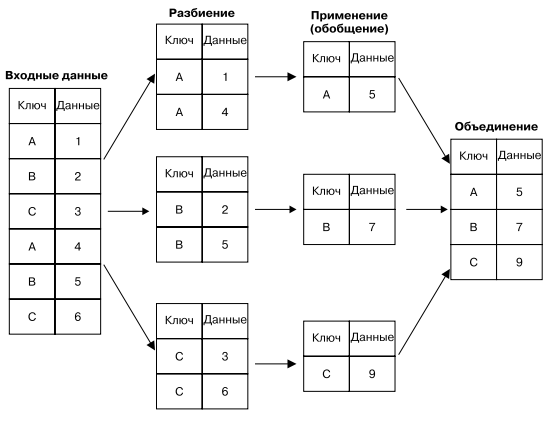

Входные данные

Ключ  Данные

A   1

B   2

C   3

A   4

B   5

C   6

Разбиение

Ключ  Данные

A   1

A   4


Разбиение

Ключ  Данные

B   2

B   5

Разбиение

Ключ  Данные

С   3

С   6

Применение

Ключ  Данные

A   5

Применение

Ключ  Данные

B   7

Применение

Ключ  Данные

C   9

Объединение

Ключ  Данные

A   5

B   7

C   9

Хотя мы, конечно, могли бы сделать это вручную с помощью какого-либо сочетания описанных выше команд маскирования, агрегирования и слияния, важно
понимать, что не обязательно создавать объекты для промежуточных разбиений.


Операция GroupBy может проделать все это за один проход по данным, вычисляя сумму, среднее значение, количество, минимум и другие сводные показатели для каждой группы. 

Мощь операции GroupBy состоит в абстрагировании этих шагов:пользователю не нужно заботиться о том, как фактически выполняются вычисления, а можно вместо этого думать об операции в целом.

В качестве примера рассмотрим использование библиотеки Pandas для выполнения показанных на рис. 3.1 вычислений.

Начнем с создания входного объекта DataFrame:

In [ ]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
 'data': range(6)}, columns=['key', 'data'])
df

Простейшую операцию «разбить, применить, объединить» можно реализовать с помощью метода groupby() объекта DataFrame, передав в него имя желаемого ключевого столбца:

In [ ]:
df.groupby('key')

Обратите внимание, что возвращаемое — не набор объектов DataFrame, а объект DataFrameGroupBy. 

Этот объект особенный, его можно рассматривать как специальное представление объекта DataFrame, готовое к группировке, но не выполняющее никаких фактических вычислений до этапа применения агрегирования. 

Подобный метод «отложенного вычисления» означает возможность очень эффективной реализации распространенных агрегирующих функций, причем практически прозрачным для пользователя образом.

Для получения результата можно вызвать один из агрегирующих методов этого объекта DataFrameGroupBy, что приведет к выполнению соответствующих шагов применения/объединения:

In [ ]:
df.groupby('key').sum()

Метод sum() — лишь один из возможных вариантов в этой команде. 

Здесь можно использовать практически любую распространенную агрегирующую функцию библиотек Pandas или NumPy, равно как и практически любую корректную операцию объекта DataFrame.

In [ ]:
df.groupby('key').max()

In [ ]:
df.groupby('key').std()

In [ ]:
df.groupby('key').var()

In [ ]:
df.groupby('key').mean()

### Объект GroupBy

Объект GroupBy — очень гибкая абстракция. 

Во многом с ним можно обращаться как с коллекцией объектов DataFrame, и вся сложность будет скрыта от пользователя. 

Рассмотрим примеры на основе набора данных «Планеты».

Вероятно, самые важные из доступных благодаря объекту GroupBy операций — агрегирование, фильтрация, преобразование и применение. 

Мы обсудим каждую из них более подробно в пункте «Агрегирование, фильтрация, преобразование,
применение» данного подраздела, но сначала познакомимся с другой функциональностью, которую можно использовать вместе с базовой операцией GroupBy.

Индексация по столбцам. 

Объект GroupBy поддерживает индексацию по столбцам
аналогично объекту DataFrame, с возвратом модифицированного объекта GroupBy.

Например:

In [ ]:
planets.head(3)

In [ ]:
planets.groupby('method')

In [ ]:
planets.groupby('method')['orbital_period']

Здесь мы выбрали конкретную группу Series из исходной группы DataFrame, сославшись на соответствующее имя столбца. 

Как и в случае с объектом GroupBy, никаких вычислений не происходит до вызова для этого объекта какого-нибудь
агрегирующего метода:

In [ ]:
planets.groupby('method')['orbital_period'].median()

Результат дает нам общее представление о масштабе чувствительности каждого из методов к периодам обращения (в днях).

Цикл по группам. 

Объект GroupBy поддерживает непосредственное выполнение циклов по группам с возвратом каждой группы в виде объекта Series или DataFrame:

In [ ]:
for (method, group) in planets.groupby('method'):
    print("{0:30s} shape={1}".format(method, group.shape))

In [ ]:
planets[planets['method'] == 'Astrometry']

Это может пригодиться для выполнения некоторых вещей вручную, хотя обычно быстрее воспользоваться встроенной функциональностью apply.

Методы диспетчеризации. 

Благодаря определенной магии классов языка Python все
методы, не реализованные явным образом объектом GroupBy, будут передаваться далее и выполняться для групп, вне зависимости от того, являются ли они объектами Series
или DataFrame. 

Например, можно использовать метод describe() объекта DataFrame для вычисления набора сводных показателей, описывающих каждую группу в данных:


In [ ]:
planets.groupby('method')['year'].describe().unstack()

Эта таблица позволяет получить лучшее представление о наших данных. 

Например, большинство планет было открыто методом измерения лучевой скорости (radial velocity method) и транзитным методом (transit method), хотя последний
стал распространенным благодаря новым более точным телескопам только в последнее десятилетие. 

Похоже, что новейшими методами являются метод вариации
времени транзитов (transit timing variation method) и метод модуляции орбитальной яркости (orbital brightness modulation method), которые до 2011 года не использовались для открытия новых планет.

Это всего лишь один пример полезности методов диспетчеризации. 

Обратите внимание, что они применяются к каждой отдельной группе, после чего результаты объединяются в объект GroupBy и возвращаются. 

Можно использовать для соответствующего объекта GroupBy любой допустимый метод объектов Series/DataFrame,
что позволяет выполнять многие весьма гибкие и мощные операции!

### Агрегирование, фильтрация, преобразование, применение

Предыдущее обсуждение касалось агрегирования применительно к операции объединения, но доступны и другие возможности. 

В частности, у объектов GroupBy имеются методы aggregate(), filter(), transform() и apply(), эффективно выполняющие множество полезных операций до объединения сгруппированных данных.

В следующих подразделах мы будем использовать объект DataFrame:

In [ ]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                  columns = ['key', 'data1', 'data2'])
df

##### Агрегирование. 

Мы уже знакомы со сводными показателями объекта GroupBy, вычисляемыми с помощью методов sum(), median() и т. п., но метод aggregate() обеспечивает еще большую гибкость. Он может принимать на входе строку, функцию
или список и вычислять все сводные показатели сразу. 

Вот пример, включающий все вышеупомянутое:

In [ ]:
df.groupby('key').aggregate(['min', np.median, max])

Еще один удобный паттерн — передача в него словаря, связывающего имена столбцов с операциями, которые должны быть применены к этим столбцам:

In [ ]:
df.groupby('key').aggregate({'data1': 'min', 
                             'data2': 'max'})

##### Фильтрация. 

Операция фильтрации дает возможность опускать данные в зависимости от свойств группы. 

Например, нам может понадобиться оставить в результате все группы, в которых стандартное отклонение превышает какое-либо критическое значение:

In [ ]:
def filter_func(x):
    return x['data2'].std() > 4

print(df)
print('-----------------')
print(df.groupby('key').std())
print('-----------------')
print(df.groupby('key').filter(filter_func))

Функция filter() возвращает булево значение, определяющее, прошла ли группа фильтрацию. 

В данном случае, поскольку стандартное отклонение группы A превышает 4, она удаляется из итогового результата.

##### Преобразование. 

В то время как агрегирующая функция должна возвращать
сокращенную версию данных, преобразование может вернуть версию полного набора данных, преобразованную ради дальнейшей их перекомпоновки. 

При подобном преобразовании форма выходных данных совпадает с формой входных.

Распространенный пример — центрирование данных путем вычитания среднего значения по группам:

In [ ]:
df.groupby('key').transform(lambda x: x - x.mean())

##### Метод apply(). 

Метод apply() позволяет применять произвольную функцию к результатам группировки. 

В качестве параметра эта функция должна получать объект DataFrame, а возвращать или объект библиотеки Pandas (например, DataFrame, Series), или скалярное значение, в зависимости от возвращаемого значения будет
вызвана соответствующая операция объединения.

Например, функция apply(), нормирующая первый столбец на сумму значений второго:

In [ ]:
def norm_by_data2(x):
    # x – объект DataFrame сгруппированных значений
    x['data1'] /= x['data2'].sum()
    return x

print(df)
print('------------------')
print(df.groupby('key').apply(norm_by_data2))


Функция apply() в GroupBy достаточно гибка. 

Единственное требование, чтобы она принимала на входе объект DataFrame и возвращала объект библиотеки Pandas или скалярное значение; что вы делаете внутри, остается на ваше усмотрение!

### Задание ключа разбиения


В представленных ранее простых примерах мы разбивали объект DataFrame по одному столбцу. 

Это лишь один из многих вариантов задания принципа формирования групп, и мы сейчас рассмотрим некоторые другие возможности.

Список, массив, объект Series и индекс как ключи группировки. 

Ключ может быть любым рядом или списком такой же длины, как и у объекта DataFrame. 

Например:

In [ ]:
L = [0, 1, 0, 1, 2, 0]

print(df)
print('-----------')
print(df.groupby(L).sum())


Разумеется, это значит, что есть еще один, несколько более длинный способ выполнить вышеприведенную операцию df.groupby('key'):

In [ ]:
print(df)
print('-----------')
print(df.groupby(df['key']).sum())

Словарь или объект Series, связывающий индекс и группу.

Еще один метод: указать словарь, задающий соответствие значений индекса и ключей группировки:

In [ ]:
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
print(df2)
print('-----------')
print(df2.groupby(mapping).sum())

Любая функция языка Python. 

Аналогично заданию соответствия можно передать функции groupby любую функцию, принимающую на входе значение индекса и возвращающую группу:

In [ ]:
print(df2) 
print('-----------')
print(df2.groupby(str.lower).mean())

Список допустимых ключей. 

Можно комбинировать любые из предыдущих вариантов ключей для группировки по мультииндексу:

In [ ]:
df2.groupby([str.lower, mapping]).mean()

### Пример группировки

В качестве примера соберем все это вместе в нескольких строках кода на языке Python и подсчитаем количество открытых планет по методу открытия и десятилетию:

In [ ]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

Это демонстрирует возможности комбинирования нескольких из вышеописанных
операций применительно к реальным наборам данных. 

Мы мгновенно получили представление о том, когда и как открывались экзопланеты в последние несколько десятилетий!

Теперь же я предложил бы углубиться в эти несколько строк кода и выполнить
их пошагово, чтобы убедиться, что вы действительно понимаете, какой вклад
в результат они вносят. Это в чем-то непростой пример, но благодаря хорошему
пониманию элементов кода у вас появятся средства для исследования ваших собственных данных.

### Домашнее задание

### Задача 1: Дан DataFrame df.

### Выполните groupby по 'Maths', после этого выполните aggregate по списку ['min', np.median, max].

### Выполните groupby по 'Maths', после этого выполните aggregate по словарю {'Maths': 'min', 'Science': 'max'}.

df = pd.DataFrame([[3, 4, 5, 2], 
                   
                   [4, 3, 4, 5], 
                   
                   [5, 2, 5, 4]], 
                   
                   columns=['Maths',  'English',  
                           
                           'Science', 'History']) 

### Задача 2: Дан словать data. Создайте из него DataFrame.

### После этого выполните groupby по "City". После этого выполните фильтрацию по условию x["City"] == "SPb".

data = {
    
    "Student_Name": ["Ivan", "Petr", "Valentina", "Masha", "Kirill"],
    
    "City": ["Moscow", "SPb", "Moscow", "Kazan", "Kazan"],
    
    "Biology": [3, 4, 5, 4, 5],
    
    "Chemistry": [4, 5, 3, 5, 4],

}

### Задача 3: Дан словать data. Создайте из него DataFrame.

### После этого выполните groupby по "City". После этого выполните фильтрацию по условию x["Biology"] == 5

data = {
    
    "Student_Name": ["Ivan", "Petr", "Valentina", "Masha", "Kirill"],
    
    "City": ["Moscow", "SPb", "Moscow", "Kazan", "Kazan"],
    
    "Biology": [3, 4, 5, 4, 5],
    
    "Chemistry": [4, 5, 3, 5, 4],

}

# 10 lesson

# Lesson topic: Сводные таблицы

Мы уже видели возможности по исследованию отношений в наборе данных, предоставляемые абстракцией GroupBy. 

Сводная таблица (pivot table) — схожая
операция, часто встречающаяся в электронных таблицах и других программах, работающих с табличными данными. 

Сводная таблица получает на входе простые
данные в виде столбцов и группирует записи в двумерную таблицу, обеспечивающую многомерное представление данных. 

Различие между сводными таблицами и операцией GroupBy иногда неочевидно. 

Лично мне помогает представлять сводные таблицы как многомерную версию агрегирующей функции GroupBy.

То есть вы выполняете операцию «разбить, применить, объединить», но как разбиение, так и объединение происходят не на одномерном индексе, а на двумерной
координатной сетке.

### Данные для примеров работы со сводными таблицами

Для примеров из этого раздела мы воспользуемся базой данных пассажиров парохода «Титаник», доступной через библиотеку Seaborn (см. раздел «Визуализация
с помощью библиотеки Seaborn» главы 4):

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset('titanic')

In [ ]:
titanic.head()

Этот набор данных содержит информацию о каждом пассажире злополучного рейса, включая пол, возраст, класс, стоимость билета и многое другое.

### Сводные таблицы «вручную»

Чтобы узнать о данных больше, можно начать с группировки пассажиров по полу, информации о том, выжил ли пассажир, или какой-то их комбинации. 

Если вы читали предыдущий раздел, то можете воспользоваться операцией GroupBy. 

Например, посмотрим на коэффициент выживаемости в зависимости от пола:

In [ ]:
titanic.groupby('sex')[['survived']].mean()

Это сразу же дает нам некоторое представление о наборе данных: в целом, три четверти находившихся на борту женщин выжило, в то время как из мужчин выжил
только каждый пятый!

Однако хотелось бы заглянуть немного глубже и увидеть распределение выживших по полу и классу. 

Говоря языком GroupBy, можно было бы идти следующим
путем: сгруппировать по классу и полу, выбрать выживших, применить агрегирующую функцию среднего значения, объединить получившиеся группы, после чего
выполнить операцию unstack иерархического индекса, чтобы обнажить скрытую многомерность. В виде кода:

In [ ]:
titanic.groupby(['sex', 'class']
               )['survived'].aggregate('mean').unstack()


Это дает нам лучшее представление о том, как пол и класс влияли на выживаемость, но код начинает выглядеть несколько запутанным. 

Хотя каждый шаг этого конвейера представляется вполне осмысленным в свете ранее рассмотренных инструментов, такая длинная строка кода не особо удобна для чтения или использования. 

Двумерный GroupBy встречается настолько часто, что в состав библиотеки Pandas был включен удобный метод, pivot_table, позволяющий описывать более кратко данную разновидность многомерного агрегирования.

### Синтаксис сводных таблиц

Вот эквивалентный вышеприведенной операции код, использующий метод pivot_table объекта DataFrame:

In [ ]:
titanic.pivot_table('survived', index='sex', columns='class')

Такая запись несравненно удобнее для чтения, чем подход с GroupBy, при том же результате. 

Как и можно было ожидать от трансатлантического круиза начала XX века, судьба благоприятствовала женщинам и первому классу. 

Женщины из первого класса выжили практически все (привет, Роуз!), из мужчин третьего класса выжила только десятая часть (извини, Джек!).

### Многоуровневые сводные таблицы

Группировку в сводных таблицах, как и при операции GroupBy, можно задавать на нескольких уровнях и с множеством параметров. 

Например, интересно взглянуть на возраст в качестве третьего измерения. 

Разобьем данные на интервалы по возрасту с помощью функции pd.cut:

In [ ]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

Мы можем применить ту же стратегию при работе со столбцами. 

Добавим сюда информацию о стоимости билета, воспользовавшись функцией pd.qcut для автоматического вычисления квантилей:

In [ ]:
age = pd.cut(titanic['age'], [0, 18, 80])
fare = pd.qcut(titanic['fare'], 2)            # qcut() - просим pandas разделить данные на 2 одинаковые группы (квантили) 
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

Результат представляет собой четырехмерную сводную таблицу с иерархическими индексами (см. раздел «Иерархическая индексация» данной главы), выведенную
в демонстрирующей отношения между значениями сетке.

### Дополнительные параметры сводных таблиц

Полная сигнатура вызова метода pivot_table объектов DataFrame выглядит следующим образом:

##### сигнатура вызова в версии 0.18 библиотеки Pandas

DataFrame.pivot_table(data, values=None, index=None, columns=None,
                      
                      aggfunc='mean', fill_value=None, margins=False,
                      
                      dropna=True, margins_name='All')

Мы уже видели примеры первых трех аргументов, в данном подразделе рассмотрим остальные. 

Два из параметров, fill_value и dropna, относятся к пропущенным значениям и интуитивно понятны, примеры их использования мы приводить не будем.

Ключевое слово aggfunc управляет тем, какой тип агрегирования применяется,
по умолчанию это среднее значение. 

Как и в GroupBy, спецификация агрегирующей функции может быть строкой с одним из нескольких обычных вариантов ('sum', 'mean', 'count', 'min', 'max' и т. д.) или функцией, реализующей агрегирование (np.sum(), min(), sum() и т. п.). 

Кроме того, агрегирование может быть задано в виде словаря, связывающего столбец с любым из вышеперечисленных вариантов:

In [ ]:
titanic.pivot_table(index='sex', columns='class', 
                    aggfunc={'survived':sum, 'fare':'mean'})

Обратите внимание, что мы опустили ключевое слово values, при задании aggfunc
происходит автоматическое определение.

Иногда бывает полезно вычислять итоги по каждой группе. Это можно сделать
с помощью ключевого слова margins:

In [ ]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

Такие итоги автоматически дают нам информацию о выживаемости вне зависимости от класса, коэффициенте выживаемости по классу вне зависимости от пола
и общем коэффициенте выживаемости 38%. 

Метки для этих итогов можно задать с помощью ключевого слова margins_name, по умолчанию имеющего значение "All".

### Пример: данные о рождаемости

В качестве примера взглянем на находящиеся в открытом доступе данные о рождаемости в США, предоставляемые центрами по контролю заболеваний (Centers for
Disease Control, CDC). 

Данные можно найти по адресу https://raw.githubusercontent.
com/jakevdp/data-CDCbirths/master/births.csv (этот набор данных довольно широко
исследовался Эндрю Гелманом и его группой (см., например, сообщение в блоге
http://bit.ly/2fZzW8K)):

In [ ]:
births = pd.read_csv('data\\births.csv')

In [ ]:
births.head()

Посмотрев на эти данные, мы обнаружим их относительную простоту — они содержат количество новорожденных, сгруппированных по дате и полу:


Мы начнем понимать эти данные немного лучше, воспользовавшись сводной таблицей.

Добавим в них столбец для десятилетия и взглянем на рождения девочек
и мальчиков как функцию от десятилетия:

In [ ]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

Сразу же видим, что в каждом десятилетии мальчиков рождается больше, чем девочек. 

Воспользуемся встроенными средствами построения графиков библиотеки Pandas для визуализации общего количества новорожденных в зависимости от года
:

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set() # Используем стили библиотеки Seaborn
births.pivot_table('births', index='year', columns='gender',
 aggfunc='sum').plot()
plt.ylabel('total births per year'); 
# общее количество новорожденных в течение года

Благодаря сводной таблице и методу plot() мы можем сразу же увидеть ежегодный
тренд новорожденных по полу. 

В последние 50 с лишним лет мальчиков рождалось больше, чем девочек, примерно на 5%.

Дальнейшее исследование данных. 

Хотя это, возможно, и не имеет отношения к сводным таблицам, есть еще несколько интересных вещей, которые можно извлечь из этого набора данных с помощью уже рассмотренных инструментов библиотеки Pandas. 

Нам придется начать с небольшой очистки данных, удалив аномальные значения, возникшие из-за неправильно набранных дат (например, 31 июня) или отсутствующих значений (например, 99 июня). 

Простой способ убрать сразу их все — отсечь аномальные значения. 

Мы сделаем это с помощью надежного алгоритма сигма-отсечения (sigma-clipping):

https://ru.wikipedia.org/wiki/%D0%9A%D0%B2%D0%B0%D0%BD%D1%82%D0%B8%D0%BB%D1%8C

In [ ]:
np.percentile(births['births'], [0, 50, 75])

In [ ]:
births['births']

In [ ]:
quartiles = np.percentile(births['births'], [25, 50, 75])
print(quartiles)
mu = quartiles[1]
print(mu)
sig = 0.74 * (quartiles[2] - quartiles[0])
print(sig)

Последняя строка представляет собой грубую оценку среднего значения выборки,
в котором 0.74 — межквартильный размах Гауссового распределения. 

Теперь можно воспользоваться методом query() (обсуждаемым далее в разделе «Увеличение производительности библиотеки Pandas: eval() и query()» этой главы) для фильтрации строк, в которых количество новорожденных выходит за пределы этих значений:

In [ ]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
births.head()

Далее мы устанавливаем целочисленный тип столбца для day. 

Ранее он был строчным, поскольку некоторые столбцы в наборе данных содержат значение 'null':

In [ ]:
# делаем тип столбца 'day' целочисленным;
# изначально он был строчным из-за пустых значений
births['day'] = births['day'].astype(int)

Наконец, мы можем создать индекс для даты, объединив день, месяц и год (см.«Работа с временными рядами» этой главы). 

Это даст нам возможность быстро вычислять день недели для каждой строки:

In [ ]:
# создаем индекс для даты из года, месяца и дня
births.index = pd.to_datetime(10000 * births.year + 
                              100 * births.month + 
                              births.day, format='%Y%m%d')
print(births.index)
births['dayofweek'] = births.index.dayofweek # День недели
print('----------------------')
births['dayofweek'].head()

C помощью этого можно построить график дней рождения в зависимости от дня недели за несколько десятилетий (рис. 3.3):

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.gca.html

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
births.pivot_table('births', index='dayofweek',
 columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Sun','Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat',
])
plt.ylabel('mean births by day'); # среднее количество новорожденных в день


Становится очевидно, что в выходные происходит меньше рождений, чем в будние дни! 

Обратите внимание, что 1990-е и 2000-е годы отсутствуют на графике,
поскольку начиная с 1989 года данные CDC содержат только месяц рождения.

Еще одно интересное представление этих данных можно получить, построив график рождений в зависимости от дня года. 

Сначала сгруппируем данные отдельно по месяцу и дню:

Глядя на этот краткий пример, вы могли заметить, что многие из рассмотренных
нами инструментов языка Python и библиотеки Pandas можно комбинировать
между собой и использовать, чтобы почерпнуть полезную информацию из множества наборов данных. Более сложные манипуляции над данными мы увидим
в следующих разделах.

### Домашнее задание

### Задача 1: 

### Задача 2: 

### Задача 3: 

# 11 lesson

# Lesson topic: Векторизованные операции над строками

Одна из сильных сторон языка Python — относительное удобство работы в нем со строковыми данными и манипуляций ими. 

Библиотека Pandas вносит в это свою лепту и предоставляет набор векторизованных операций над строками, ставших
существенной частью очистки данных, необходимой при работе с реальными данными. 

В этом разделе мы изучим некоторые строковые операции библиотеки Pandas.

### Знакомство со строковыми операциями библиотеки Pandas


В предыдущем разделе мы видели, как обобщают арифметические операции такие инструменты, как библиотека NumPy и библиотека Pandas, позволяя легко и быстро выполнять одну и ту же операцию над множеством элементов массива.

Например:

In [ ]:
import numpy as np
x = np.array([2, 3, 5, 7, 11, 13])
x * 2

Векторизация операций упрощает синтаксис работы с массивами данных: больше нет необходимости беспокоиться о размере или форме массива, а только о нужной нам операции. 

Библиотека NumPy не предоставляет такого простого способа
доступа для массивов строк, так что приходится использовать более длинный синтаксис циклов:

In [ ]:
data = ['peter', 'Paul', 'MARY', 'gUIDO']
[s.capitalize() for s in data]

Вероятно, для работы с некоторыми данными этого достаточно, но при наличии отсутствующих значений все портится. 

Например:

In [ ]:
data = ['peter', 'Paul', None, 'MARY', 'gUIDO']
[s.capitalize() for s in data]


Библиотека Pandas включает средства как для работы с векторизованными строковыми операциями, так и для корректной обработки отсутствующих значений
посредством атрибута str объектов Series библиотеки Pandas и содержащих строки объектов Index. 

Так, допустим, мы создали объект Series библиотеки Pandas
с теми же данными:

In [ ]:
import pandas as pd
names = pd.Series(data)
names

Теперь можно вызвать один-единственный метод для преобразования строчных букв в заглавные, который будет игнорировать любые отсутствующие значения:

In [ ]:
names.str.capitalize()

С помощью Tab-автодополнения для этого атрибута str можно получить список всех векторизованных строковых методов, доступных в библиотеке Pandas.

#курсор в конце, нажать Tab для просмотра строковых методов

names.str.

### Таблицы методов работы со строками библиотеки Pandas

Если вы хорошо разбираетесь в манипуляции строковыми данными в языке Python, львиная доля синтаксиса работы со строками библиотеки Pandas будет вам интуитивно понятна настолько, что достаточно, наверное, просто привести таблицу имеющихся методов. 

С этого и начнем, прежде чем углубимся в некоторые нюансы.

Примеры в этом разделе используют следующий ряд имен:

In [ ]:
monte = pd.Series(['Graham Chapman', 
                   'John Cleese', 
                   'Terry Gilliam',
                   'Eric Idle', 
                   'Terry Jones', 
                   'Michael Palin'])

### Методы, аналогичные строковым методам языка Python

Практически для всех встроенных строковых методов Python есть соответствующий векторизованный строковый метод библиотеки Pandas. 

Вот список методов атрибута str библиотеки Pandas, дублирующий строковые методы языка Python:


##### ● len(), lower(), translate(), islower(),

##### ● ljust(), upper(), startswith(), isupper(),

##### ● rjust(), find(), endswith(), isnumeric(),

##### ● center(), rfind(), isalnum(), isdecimal(),

##### ● zfill(), index(), isalpha(), split(),

##### ● strip(), rindex(), isdigit(), rsplit(),

##### ● rstrip(), capitalize(), isspace(), partition(),

##### ● lstrip(), swapcase(), istitle(), rpartition()

Обратите внимание, что возвращаемые значения у них отличаются. 

Некоторые, например lower(), возвращают Series строк:

In [ ]:
monte.str.lower()

Часть других возвращает числовые значения:

In [ ]:
monte.str.len()

Или булевы значения:

In [ ]:
monte.str.startswith('T')

Или списки и другие составные значения для каждого элемента:

In [ ]:
monte.str.split()

Мы увидим манипуляции над подобными объектами типа «ряды списков», когда продолжим обсуждение.

### Методы, использующие регулярные выражения

Помимо этого, существует и несколько методов, принимающих на входе регулярные выражения для проверки содержимого каждого из строковых элементов и 
следующих некоторым соглашениям по API встроенного модуля re языка Python (смотрите Таблицу внизу).

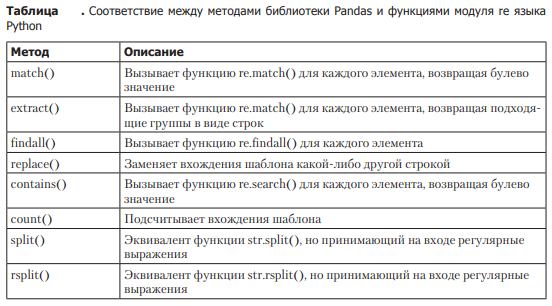


##### Регулярные выражения или RegEx — строки, задающие шаблон для поиска фрагментов в тексте. 

По сути, RegEx можно назвать узкоспециализированным языком программирования, встроенным в Python. 

У регулярных выражений есть свой строгий синтаксис, набор функций для проверки совпадений и изменения исходной строки.

In [ ]:
s = 'it is my new task'
s.split()

In [ ]:
s.rsplit()

In [ ]:
s.split(maxsplit=2)

In [ ]:
s.rsplit(maxsplit=2)

C помощью этих функций можно выполнять массу интересных операций. Например, можно извлечь имя из каждого элемента, выполнив поиск непрерывной
группы символов в начале каждого из них:

In [ ]:
monte.str.extract('([A-Za-z]+)')


Или, например, найти все имена, начинающиеся и заканчивающиеся согласным звуком, воспользовавшись символами регулярных выражений «начало строки» (^)
и «конец строки» ($):

In [ ]:
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

Такой сжатый синтаксис регулярных выражений для записей объектов Series и DataFrame открывает массу возможностей для анализа и очистки данных.

##### Прочие методы

Наконец, существуют и прочие методы, пригодные для разных удобных операций (смотрите Таблицу ниже).

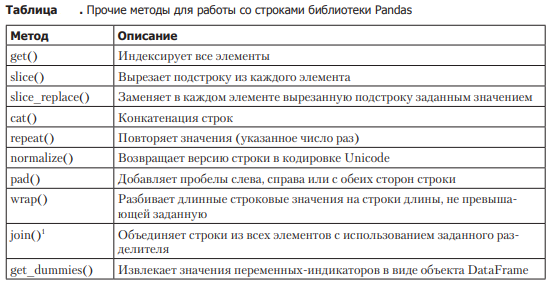

##### Векторизованный доступ к элементам и вырезание подстрок. 

Операции get() и slice(), в частности, предоставляют возможность векторизованного доступа к элементам из каждого массива. 

Например, можно вырезать первые три символа из каждого массива посредством выражения str.slice(0, 3). 

Обратите внимание, что такая возможность доступна и с помощью обычного синтаксиса индексации языка Python, например, df.str.slice(0, 3) эквивалентно
df.str[0:3]:

In [ ]:
monte.str[0:3]

In [ ]:
monte.str.slice(0, 3)

In [ ]:
monte.str[0:3]

Индексация посредством df.str.get(i) и df.str[i]происходит аналогично.


Эти методы get() и slice() также дают возможность обращаться к элементам возвращаемых методом split() массивов. 

Например, для извлечения фамилии из каждой записи можно использовать вместе методы split() и get():

In [ ]:
monte.str.split().str.get(-1)

###### Индикаторные переменные.

Еще один метод, требующий некоторых дополнительных пояснений, — get_dummies(). 

Удобно, когда в данных имеется столбец,
содержащий кодированный индикатор. 

Например, у нас есть набор данных, содержащий информацию в виде кодов, таких как A="родился в США", B="родился
в Великобритании", C="любит сыр", D="любит мясные консервы":

In [ ]:
full_monte = pd.DataFrame({'name': monte,
                           'info': ['B|C|D', 
                                    'B|D', 
                                    'A|C', 
                                    'B|D', 
                                    'B|C',
                                    'B|C|D']})
full_monte

Метод get_dummies() дает возможность быстро разбить все индикаторные переменные, преобразовав их в объект DataFrame:

In [ ]:
full_monte['info'].str.get_dummies('|')

Используя эти операции как «строительные блоки», можно создать бесчисленное множество обрабатывающих строки процедур для очистки данных.

Мы не будем углубляться в эти методы, но я рекомендую прочитать раздел Working with Text Data («Работа с текстовыми данными») из онлайн-документации библиотеки Pandas (http://pandas.pydata.org/pandas-docs/stable/text.html) или заглянуть в раздел «Дополнительные источники информации» данной главы.

# Работа с временными рядами

Библиотека Pandas была разработана в расчете на построение финансовых моделей, так что, как вы могли и ожидать, она содержит весьма широкий набор инструментов для работы с датой, временем и индексированными по времени данными. 

Данные о дате и времени могут находиться в нескольких видах, которые мы сейчас обсудим.

Метки даты/времени ссылаются на конкретные моменты времени (например, 4 июля 2015 года в 07:00 утра).

● Временные интервалы и периоды ссылаются на отрезки времени между конкретными начальной и конечной точками (например, 2015 год). 
Периоды обычно представляют собой особый случай интервалов, с непересекающимися интервалами одинаковой длительности (например, 24-часовые периоды времени,
составляющие сутки).

● Временная дельта (она же продолжительность) относится к отрезку времени конкретной длительности (например, 22,56 с).

В данном разделе мы расскажем, как работать с каждым из этих типов временных данных в библиотеке Pandas. 

Короткий раздел никоим образом не претендует на
звание исчерпывающего руководства по имеющимся в Python или библиотеке Pandas инструментам работы с временными рядами. 

Он представляет собой обзор работы с временными рядами в общих чертах. 

Мы начнем с краткого обсуждения инструментов для работы с датой и временем в языке Python, прежде чем перейти
непосредственно к обсуждению инструментов библиотеки Pandas. 

После перечисления источников углубленной информации мы рассмотрим несколько кратких примеров работы с данными временных рядов в библиотеке Pandas.

## Дата и время в языке Python

В мире языка Python существует немало представлений дат, времени, временных дельт и интервалов времени. 

Хотя для приложений науки о данных наиболее удобны инструменты работы с временными рядами библиотеки Pandas, не помешает посмотреть на другие используемые в Python пакеты.

### Нативные даты и время языка Python: пакеты datetime и dateutil

Базовые объекты Python для работы с датами и временем располагаются во встроенном пакете datetime. 

Его, вместе со сторонним модулем dateutil, можно использовать для быстрого выполнения множества удобных операций над датами и временем. 

Например, можно вручную сформировать дату с помощью типа datetime:


In [ ]:
from datetime import datetime
datetime(year=2015, month=7, day=4)

Или, воспользовавшись модулем dateutil, можно выполнять синтаксический разбор дат, находящихся во множестве строковых форматов:

In [ ]:
from dateutil import parser
date = parser.parse("4th of July, 2015")
date

In [ ]:
date.strftime('%A')

In [ ]:
date = parser.parse("4 of July 2015")
date

In [ ]:
date = parser.parse("4.07.15")
date

In [ ]:
parser.parse("2012.10.02")

In [ ]:
parser.parse("4.1.2012").day

In [ ]:
parser.parse("4.1.2012").month

При наличии объекта datetime можно делать вывод дня недели:

In [ ]:
date.strftime('%A')

В этой команде мы использовали для вывода даты один из стандартных кодов форматирования строк ("%A"), 
о котором можно прочитать в разделе strftime (https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior) 
документации по пакету datetime (https://docs.python.org/3/library/datetime.html) языка Python. 
Документацию по другим полезным утилитам для работы с датой и временем можно найти 
в онлайн-документации пакета dateutil (http://labix.org/python-dateutil). Не помешает 
также быть в курсе связанного с ними пакета pytz (http://pytz.sourceforge.net), 
содержащего инструменты для работы с частью данных временных рядов — часовыми поясами.
Сила пакетов datetime и dateutil заключается в их гибкости и удобном синтаксисе: 
эти объекты и их встроенные методы можно использовать для выполнения 
практически любой интересующей вас операции. Единственное, в чем они работают 
плохо, это работа с большими массивами дат и времени: подобно спискам числовых 
переменных языка Python, работающим неоптимально по сравнению с типизированными 
числовыми массивами в стиле библиотеки NumPy, списки объектов даты/
времени Python работают с меньшей производительностью, чем типизированные 
массивы кодированных дат.

Что можно добавить к сказанному и рассмотренному материалу по библиотеке pandas?

Вопросы могут быть и обязательно будут у Вас. И это нормально.

В этом случае можно посоветовать:

● Обращаться к официальной технической документации библиотеки Numpy (http://www.pandas.org)

● Задавать вопросы на ресурсе https://stackoverflow.com/

● Гуглить и находить ответы на все интересующие вопросы.

### Рекомендуемая литература:

1.Уэс Маккини. Python и анализ данных. М.: МК Пресс, 2023.

2.Джоэл Грас. Data science. Наука о данных с нуля. СПб.: БХВ-Петербурr, 2021. 

3.Дж.Вандер Плас. Python для сложных задач. Наука о данных и машинное обучение. СПб.: Питер, 2018.

### Домашнее задание

### Задача 1: Создайте объект Series из списка list.

list = ['foo', 'fuz', np.nan]

### Если слово в созданной Series начинается с символа 'f', замените этот символ на строку 'ba'.

### Задача 2: Создайте объект Series из списка list.

list = ['Lion', 'Monkey', 'Rabbit']

### Поиск слова по шаблону: если слово в созданной Series 'Monkey', выведите его.

### Другие слова не должны выводиться.

### Задача 3: Создайте объект Series из списка list.

list = ['Иван Петров', 
        
        'Светлана Пушкина', 
        
        'василий Сидоров',
        
        'Татьяна ларина', 
        
        'Фёдор Онегин', 
        
        'сергей кукушкин']

### Выведите на экран список всех фамилий людей из списка (первая буква фамилии должна быть заглавная).

### Выведите на экран список всех имён людей из списка (первая буква имени должна быть заглавная).